# **Final Project 4 - Clustering**

Nama        : Afwa Afini <br>
KMI Batch   : 5 <br>

### 1. Introduction
------

#### 1.1. Latar Belakang
Keberadaan kartu kredit sudah dikenal sejak lama, namun model transaksi keuangan saat ini membuat kartu kredit menjadi jauh lebih berguna dan nyaman. Kartu kredit itu sendiri diartikan sebagai alat pembayaran berupa kartu yang biaya pembayaran dalam suatu transaksinya ditanggung terlebih dahulu oleh penerbit kartu. Setelah itu, pemegang kartu kredit wajib melunasi hutang pembayaran kartu tepat waktu yang telah disepakati sebelumnya. Kartu kredit berbeda dari kartu debit uang asli nasabah, sehingga kartu kredit dapat menawarkan manfaat unik bagi orang yang menggunakannya. Kartu kredit dengan kartu debit perbedaannya hanya terletak pada modal yang digunakan. Dana kartu kredit adalah saldo terutang yang dibatasi hingga jumlah tertentu.

Pemegang kartu kredit akan dikenakan biaya tertentu atas penggunaan kartu kredit tersebut. Biaya tahunan dibebankan kepada pengguna kartu kredit sesuai dengan fasilitas yang diberikan oleh bank. Dalam banyak kasus, biaya tahunan tahun pertama sering kali diabaikan untuk keuntungan tambahan bagi pengguna kartu kredit. Selain itu, ada biaya keterlambatan dan bunga. Biaya keterlambatan pembayaran dikenakan jika pemegang kartu terlambat membayar tagihan. Selama periode ini, bunga akan dikenakan jika nasabah menggunakan kartu untuk pembayaran kredit atau cicilan. 



#### 1.2. Dataset
Dataset yang digunakan berasal dari open source yang didapatkan dari kaggle, yakni Credit Card Data yang berisi transaksi pengguna kartu kredit sebanyak 9000 orang selama 6 bulan. Dengan jumlah baris 8950 dan kolom 18.

#### 1.3. Objektif
Objektif yang ingin dicapai pada Final Project 4 ini guna mengevaluasi konsep Clustering, sebagai berikut:
- Memahami konsep Clustering dengan menggunakan Scikit-Learn
- Mempersiapkan data untuk digunakan dalam Clustering
- Mengimplementasikan Clustering pada data yang diberikan


### 2. Import Library
-----

In [3]:
# Main Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

import warnings
warnings.filterwarnings("ignore")

### 3. Data Loading
-----
Data Loading adalah proses untuk menyalin dan memuat kumpulan data dari file sumber, folder atau aplikasi ke database atau aplikasi serupa. Pada project ini, data loading dilakukan dengan cara import file csv.

In [4]:
# Load the data source
df = pd.read_csv("./dataset/FP4-Credit Card General.csv")

In [12]:
# Understanding the characteristic of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
# Display the first 5 rows of data
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [8]:
# Display the last 5 data record
df.tail()

CUST_ID     BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
8945  C19186   28.493517           1.000000     291.12              0.00   
8946  C19187   19.183215           1.000000     300.00              0.00   
8947  C19188   23.398673           0.833333     144.40              0.00   
8948  C19189   13.457564           0.833333       0.00              0.00   
8949  C19190  372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
8945  325.594462         48.886365              0.50       6  
8946  275.861322               NaN              0.00       6  
8947   81.270775         82.418369              0.25       6  
8948   52.549959         55.755628              0.25       6  
8949   63.165404         88.288956              0.00       6

In [9]:
# Display dataframe dimensions (rows, columns)
df.shape

(8950, 18)

In [10]:
# Display the list of features
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [11]:
# Calculating the unique value of each column
df.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

This dataset contains 18 columns, namely:
1. custid: Credit Card holder identification
2. balance: The balance of the amount remaining in the account to make a purchase
3. balancefrequency: How often the Balance is updated (1 = frequently updated, 0 = not frequently updated)
4. purchases: The number of purchases made from the account
5. oneoffpurchases: Maximum number of purchases made in one go
6. installment purchases: Amount of purchases made in installments
7. cashadvance: Down payment provided by the user
8. purchasesfrequency: How often purchases are made (1 = frequently updated, 0 = not frequently updated)
9. oneoffpurchasesfrequency: How often purchases occur all at once (1 = frequently updated, 0 = not frequently updated)
10. purchasesinstallmentsfrequency: Frequency of Installment Purchases (1 = frequently updated, 0 = not frequently updated)
11. cashadvancefrequency: How often cash advances are paid
12. cashadvanceTRX: Number of Transactions made with "Cash in Advance"
13. purchasesTRX: Number of purchase transactions made
14. creditlimit: Credit Card Limit for the user
15. payments: Number of Payments made by the user
16. minimum_payments: Minimum payment amount made by the user
17. PRCfullpayment: Percentage of full payment paid by the user
18. tenure: The term of credit card service for the user

### 4. Data Cleaning
-----
The process of preparing data to be ready for analysis by first cleaning it by deleting or modifying data that is incorrect, incomplete, irrelevant, duplicated, or formatted incorrectly.

At this stage it will be done:
- Check duplicates data
- Check missing data and then handling it
- Removing unnecessary columns
- Check and handling outliers

##### 4.1. Check duplicates data

In [13]:
# Checking the duplicates
df.duplicated().sum()

0

##### 4.2. Check missing data and then handling i

In [14]:
# Checking empty data
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

We delete the missing value in the **credit limit** feature because there is only 1 empty data, 

In [15]:
# Delete missing data in the credit limit feature
df.dropna(subset=["CREDIT_LIMIT"], inplace=True)

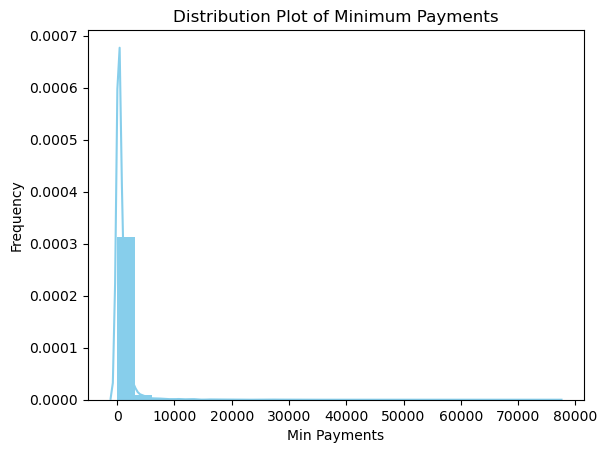

In [16]:
# Check the distribution of Minimum_Payments feature
sns.distplot(df['MINIMUM_PAYMENTS'], bins=25, kde=True, color='skyblue', hist_kws={'linewidth':15, 'alpha':1})
plt.title('Distribution Plot of Minimum Payments')
plt.xlabel('Min Payments')
plt.ylabel('Frequency')
plt.show()

The distribution plots show that the feature belong to the right skewed distribution. So, we imputing the missing value with the median.

In [17]:
# Handling missing value with median
df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].median(), inplace=True)

In [18]:
# re-check the missing value
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Missing values in the general credit card data have been cleaned up and now there are no more missing values.

##### 4.3. Removing unnecessary feature
'CUST_ID' is a high cardinality feature with unique id for each customer, won't play any role in determining the cluster.

In [24]:
# Removing the CUST_ID
# df.drop(columns=["CUST_ID"], inplace=True)
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40             0.000   
1  3202.467416           0.909091       0.00             0.000   
2  2495.148862           1.000000     773.17           773.170   
3  1666.670542           0.981818    1499.00           309.918   
4   817.714335           1.000000      16.00            16.000   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   1068.127248             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    0.650000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000               0.0            2.0        1000.0   
1                0.250000               4.0            0.0        7000.0   
2                0.000000               0.0           12.0        7500.0   
3                0.083333               1.0            1.0        7500.0   
4                0.000000               0.0            1.0        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000    12.0  
1  4103.032597       1072.340217          0.222222    12.0  
2   622.066742        627.284787          0.000000    12.0  
3     0.000000        312.452292          0.000000    12.0  
4   678.334763        244.791237          0.000000    12.0

##### 4.4. Check and handling outliers

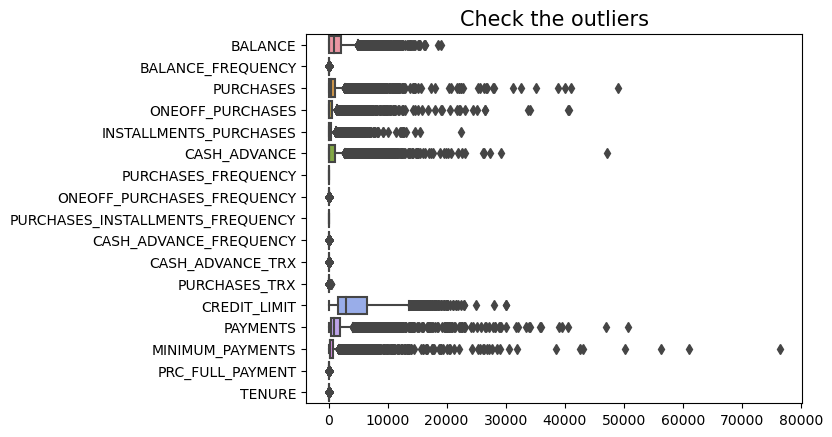

In [20]:
# View the boxplot to see the outlier
sns.boxplot(df, orient='h')
plt.title('Before the outliers', fontsize=15)
plt.show()

It can be seen that the boxplot above has a lot of outliers, so we need to handle outliers. Here, we handle outliers by setting all outliers as NaN, then impute the missing values.

In [21]:
# Iterate through each column in the data frame
for col in df.columns:
    
    # Retrieve data from the column being processed
    data = df[col]
    
    # Calculating the first quartile (Q1) and third quartile (Q3)
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)

    # Calculating the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Determine the lower and upper bounds for outlier identification
    min = Q1 - (1.5 * IQR)
    max = Q3 + (1.5 * IQR)
 
    # Identifying outliers in columns
    outliers = ((data < min) | (data > max))

    # Replacing outlier values with NaN
    df.loc[outliers, col] = np.nan
    
# Check the missing data    
df.isna().sum()


BALANCE                              695
BALANCE_FREQUENCY                   1492
PURCHASES                            808
ONEOFF_PURCHASES                    1013
INSTALLMENTS_PURCHASES               867
CASH_ADVANCE                        1030
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY           782
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY               525
CASH_ADVANCE_TRX                     804
PURCHASES_TRX                        766
CREDIT_LIMIT                         248
PAYMENTS                             808
MINIMUM_PAYMENTS                     909
PRC_FULL_PAYMENT                    1474
TENURE                              1365
dtype: int64

Features such as "PURCHASES_FREQUENCY" and "PURCHASES_INSTALLMENTS_FREQUENCY" have no NaN values after the outliers identification process. This suggests that the data on these features may have a relatively normal distribution without significant outliers.

In [22]:
# Initialize the KNNImputer to impute the NaN
imputer = KNNImputer()

# Fill in missing values in the DataFrame
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Check the missing data
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

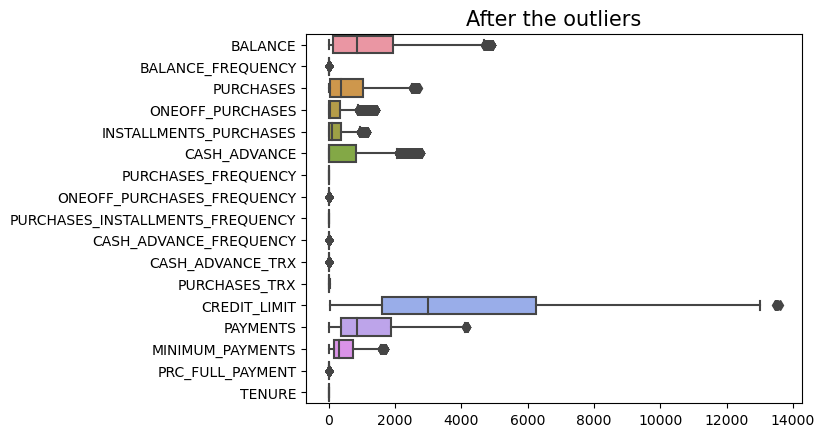

In [26]:
# View the boxplot to see the outlier
sns.boxplot(df, orient='h')
plt.title('After the outliers', fontsize=15)
plt.show()

After filling in the missing values in the DataFrame due to handling outliers and handling missing values, as can be seen that the data is clean, there are no missing values and duplicate data, so the credit card data can enter the data exploration stage to get insight from the data.

### 5. Exploratory Data Analysis
-----
__Exploratory Data Analysis__ or __EDA__ is a critical process of conducting preliminary investigations on data with the aim of finding patterns, anomalies, testing hypotheses and checking assumptions with the help of summary statistics and then graphical representations (visualizations).

##### 5.1. Checking data correlation with heatmaps

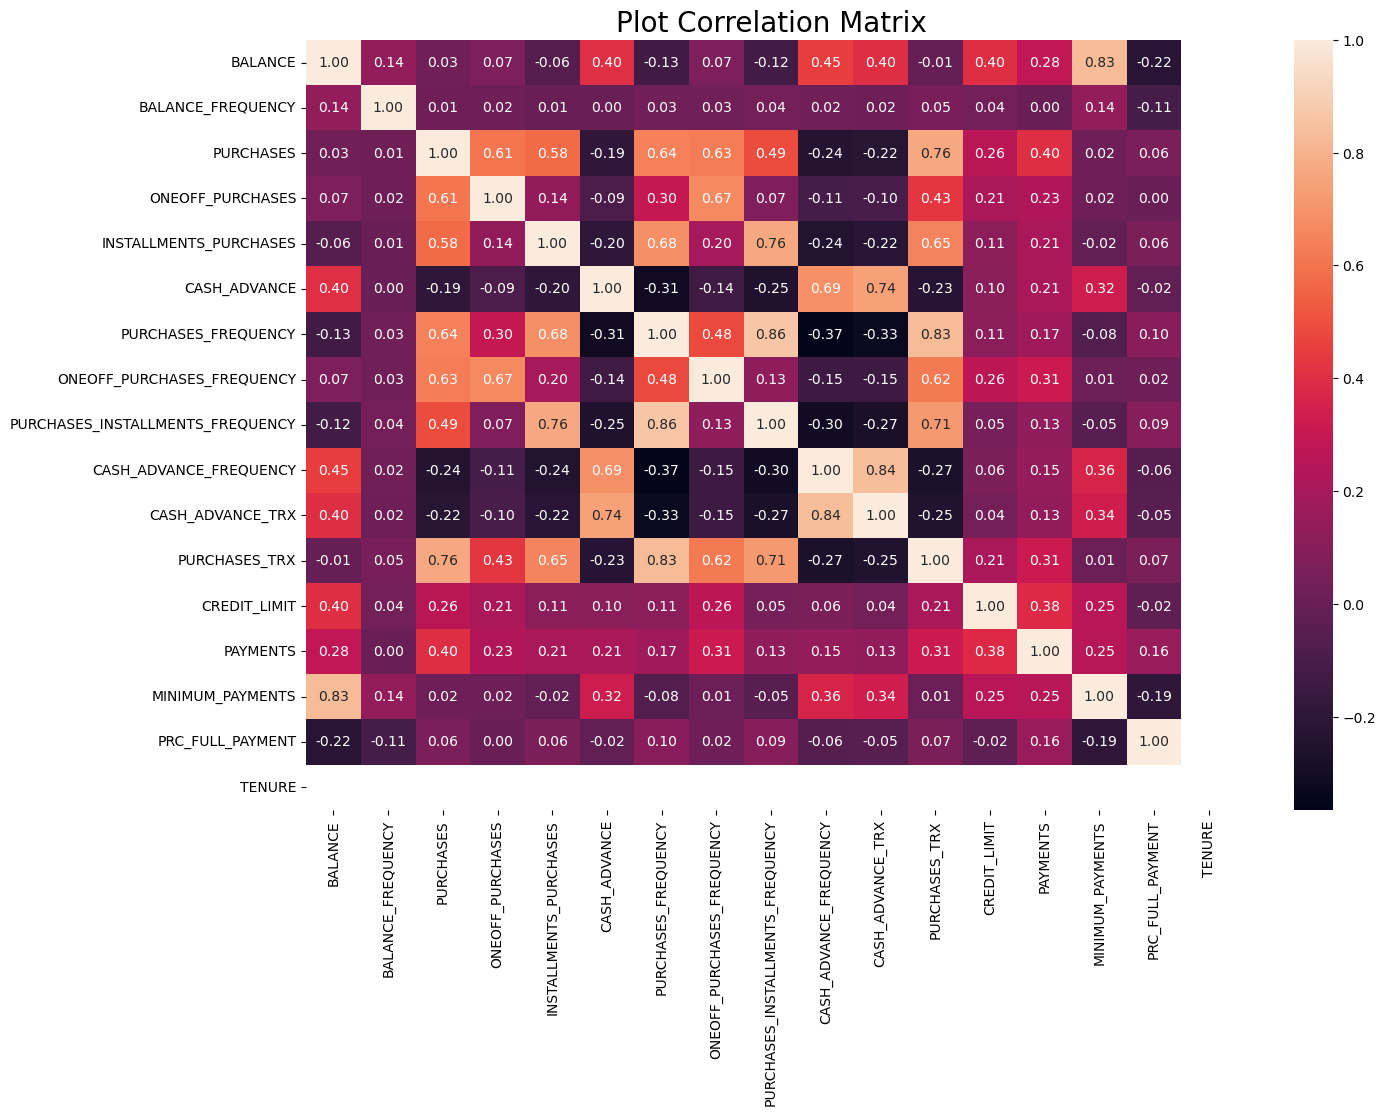

In [29]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title('Plot Correlation Matrix', size=20)
plt.show()

In the Correlation Matrix Plot, it can be seen that some features have quite high correlation values but have not yet led to multicollinearity.

##### 5.2. Checking data correlation with histograms

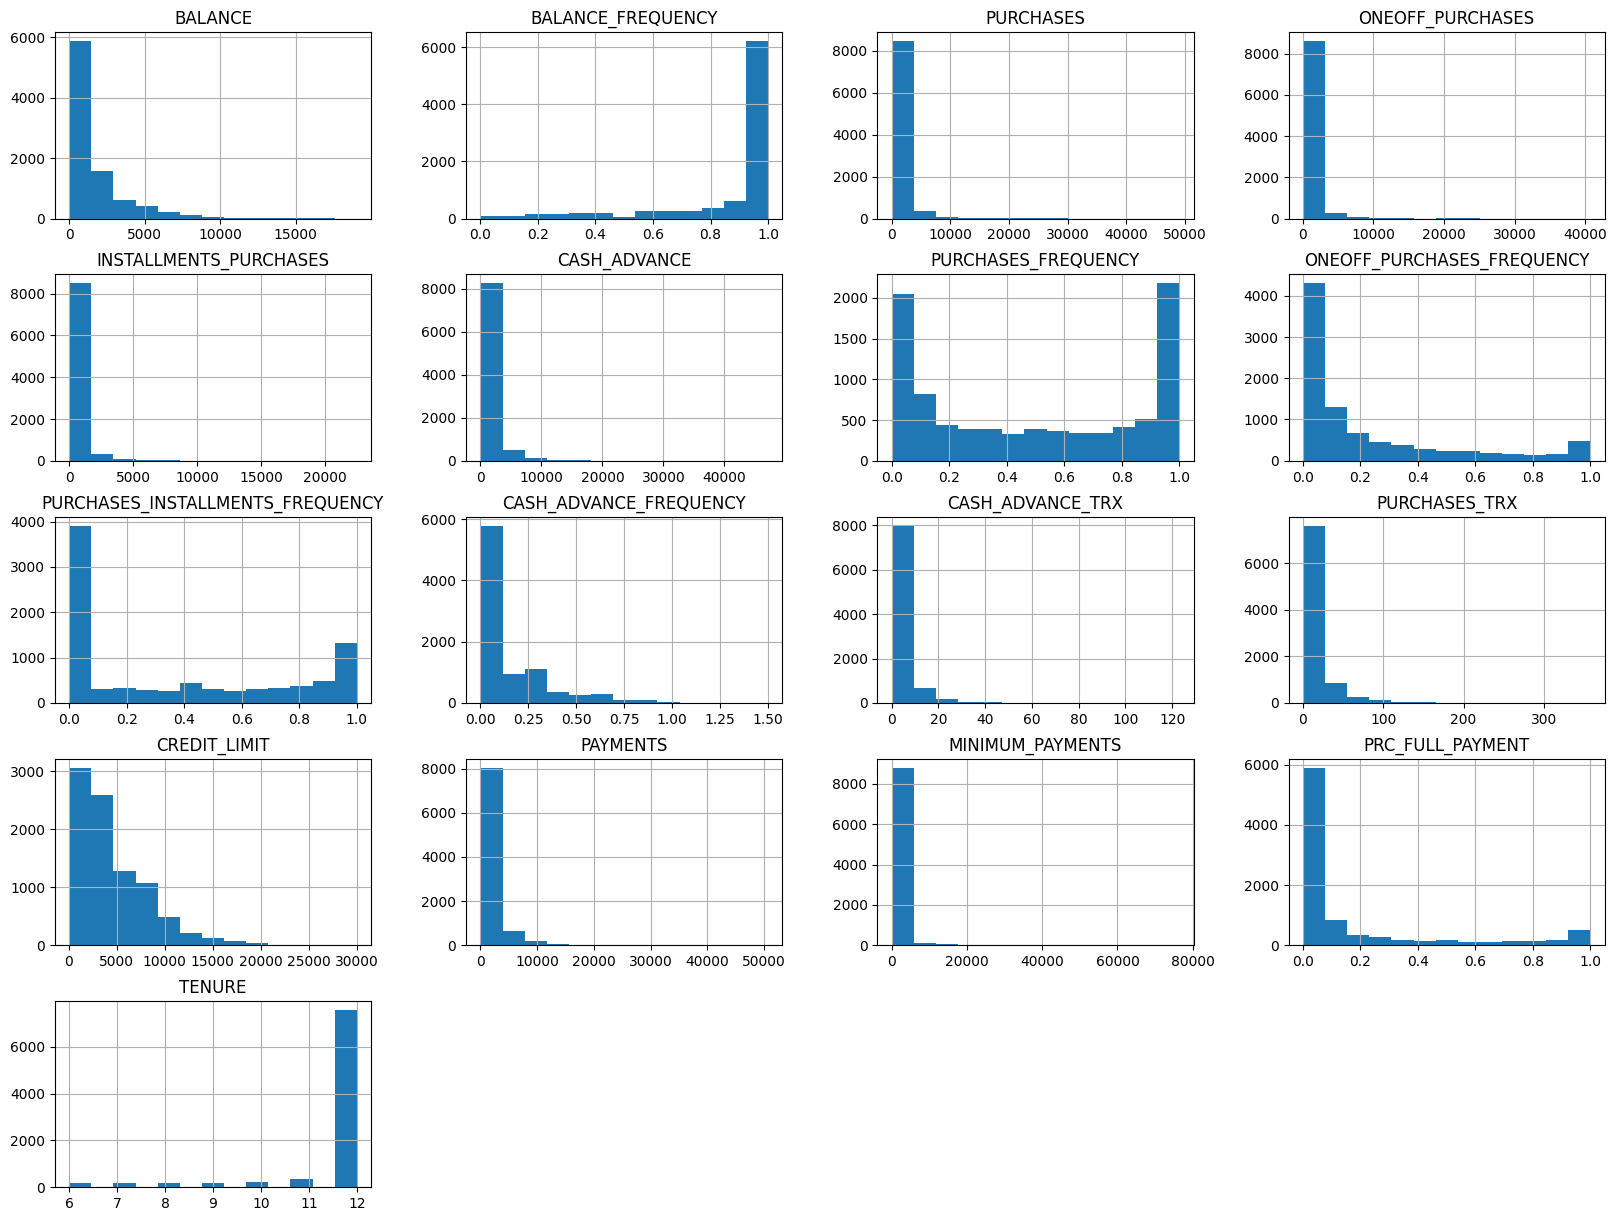

In [ ]:
df.hist(bins=13, figsize=(20,15), layout=(5,4));

The histogram graph above is a visualization of all the numerical data in the credit card data. Most of the Features are Right Skewed.

##### 5.3. 'Tenure' Exploration

In [ ]:
# Check the nunique value
df["TENURE"].value_counts()

TENURE
12    7584
11     365
10     236
6      203
8      196
7      190
9      175
Name: count, dtype: int64

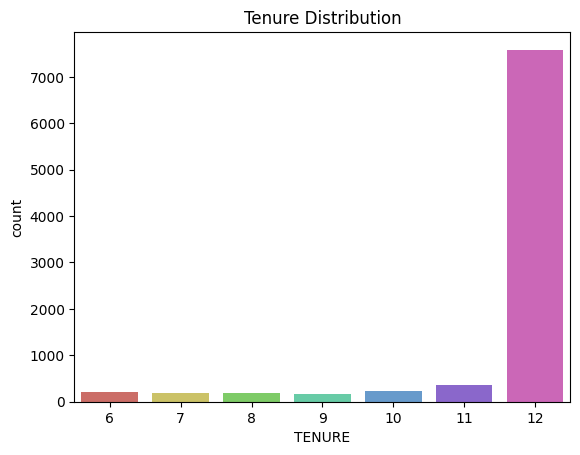

In [ ]:
# Plot the graph
sns.countplot(x="TENURE", data=df, palette="hls")
plt.title("Tenure Distribution")
plt.show()

From the graph, it is found that more users choose to make credit card service payments (tenure) for 12 months than in other months.

##### 5.4. Exploration of relationships between features

Text(0.5, 1.0, 'Korelasi Data Credit Limit Dengan Balance')

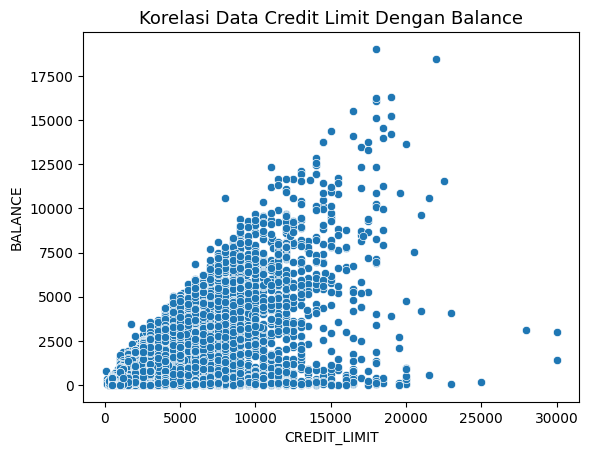

In [ ]:
# Plot the relation between x and y features 
sns.scatterplot(x="CREDIT_LIMIT", y="BALANCE", data=df)
plt.title("Korelasi Data Credit Limit Dengan Balance", fontsize= 13)

From the scatter plot, it can be seen that there is a positive correlation between credit limit and balance.

### 6. Data Preprocessing
-----
Clustering with K-Means, input data requirements:
1. Numerical variables only
2. Data has no noise or outliers
3. Data has symmetric distribution of variables (it isn't skewed)
4. Variables on the same scale (have the same mean and variance, usually in a range -1.0 to 1.0 (standardized data) or 0.0 to 1.0 (normalized data))
5. There is no collinearity (a high level of correlation between two variables)
6. Few numbers of dimensions (Data Reduction: PCA)

Note: the requirements for points 1 and 2 have been done at the Data Cleaning stage and point 5 has been validated at the EDA stage. So this stage will only perform the requirements to fulfill points 3, 4, and 6.

#### 6.1. Handling Skewness using Log Transformation
- The use of log transformation aims to overcome the skewness problem in certain features of the DataFrame.

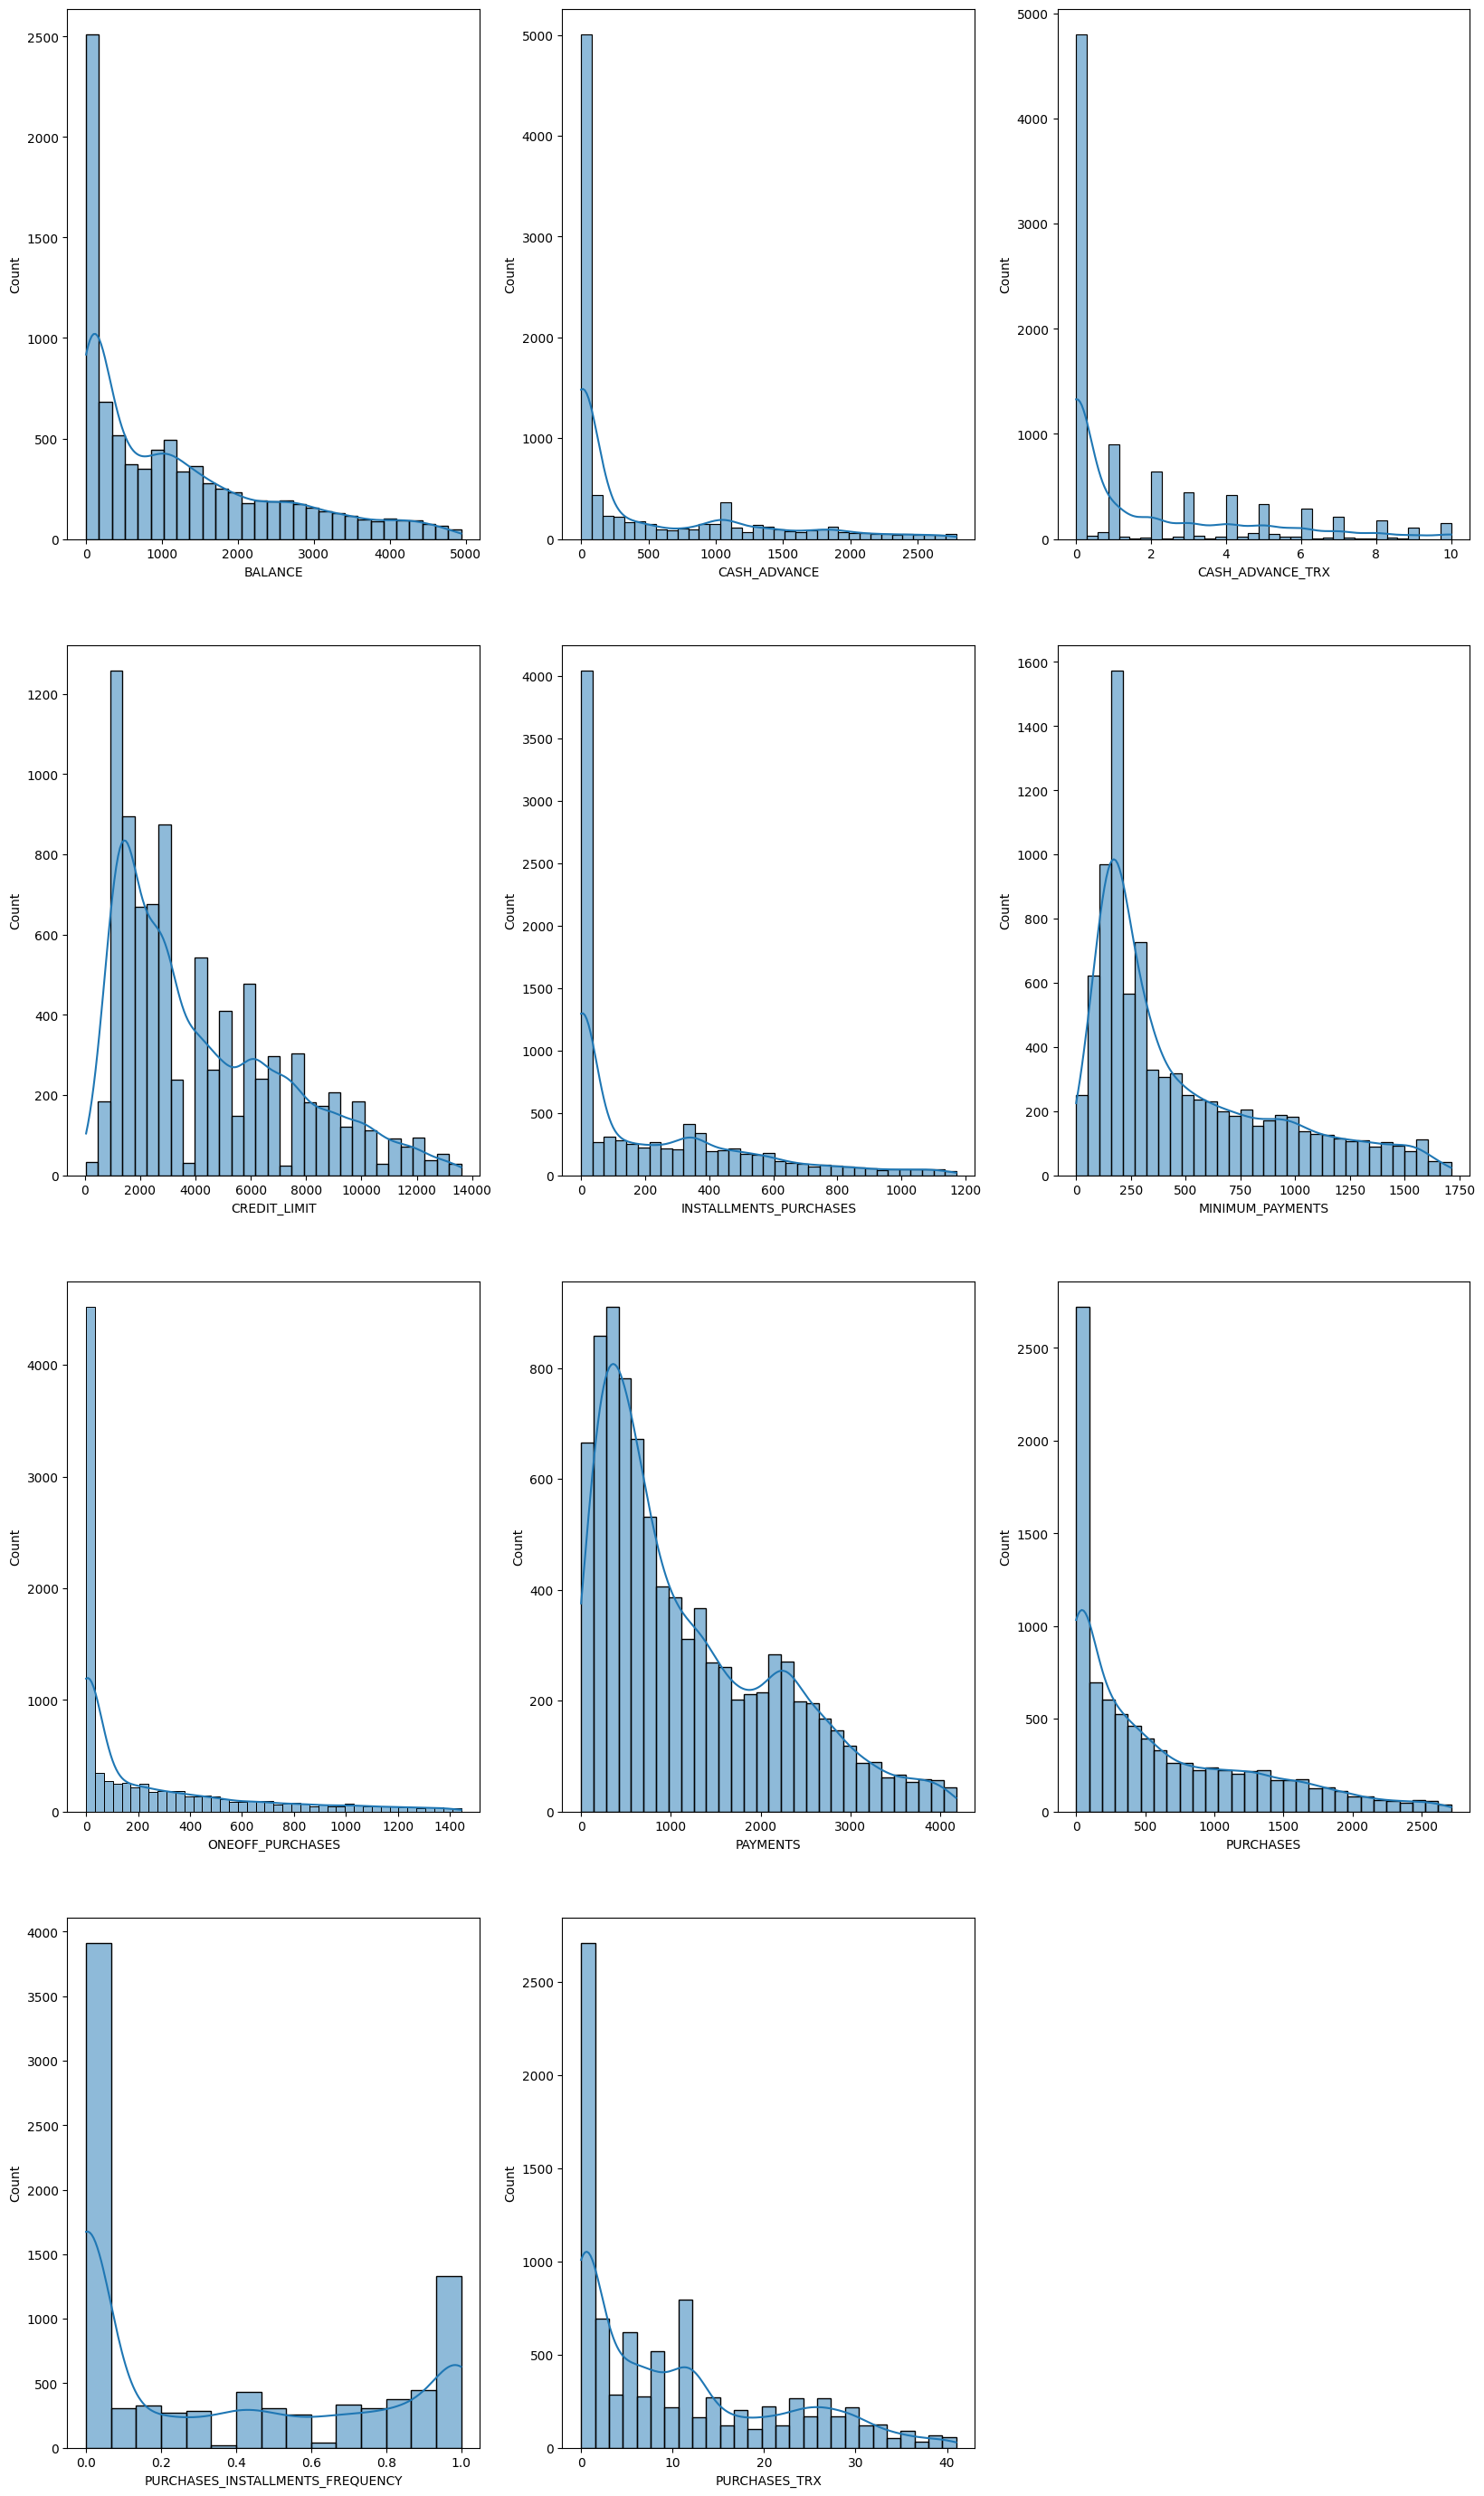

In [106]:
# Identification of features that are considered necessary in handling skewness
Skewed_Cols = df.columns.difference(['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
                                    'CASH_ADVANCE_FREQUENCY','PRC_FULL_PAYMENT', 'TENURE'])

# Plot the data skewed before log transform
plt.figure(figsize=(20,35))

for i, col in enumerate(df[Skewed_Cols]):
        ax = plt.subplot(4, 3, i+1)
        sns.histplot(df[col] , ax=ax , kde=True)
        plt.xlabel(col)  
plt.show()

It can be seen that in this figure, the original distribution of the features is skewed to the right or to the left, the log transformation can help to make the distribution more symmetrical. This can reduce the effect of extreme or outlier values on the distribution.

In [33]:
# Initialize a new variable from the first dataframe copy result
trans_df = df.copy()

for col in Skewed_Cols:
    trans_df[col] = np.log(1 + trans_df[col])

The log transformation is applied to each value in the feature with the formula np.log(1 + trans_df[col])

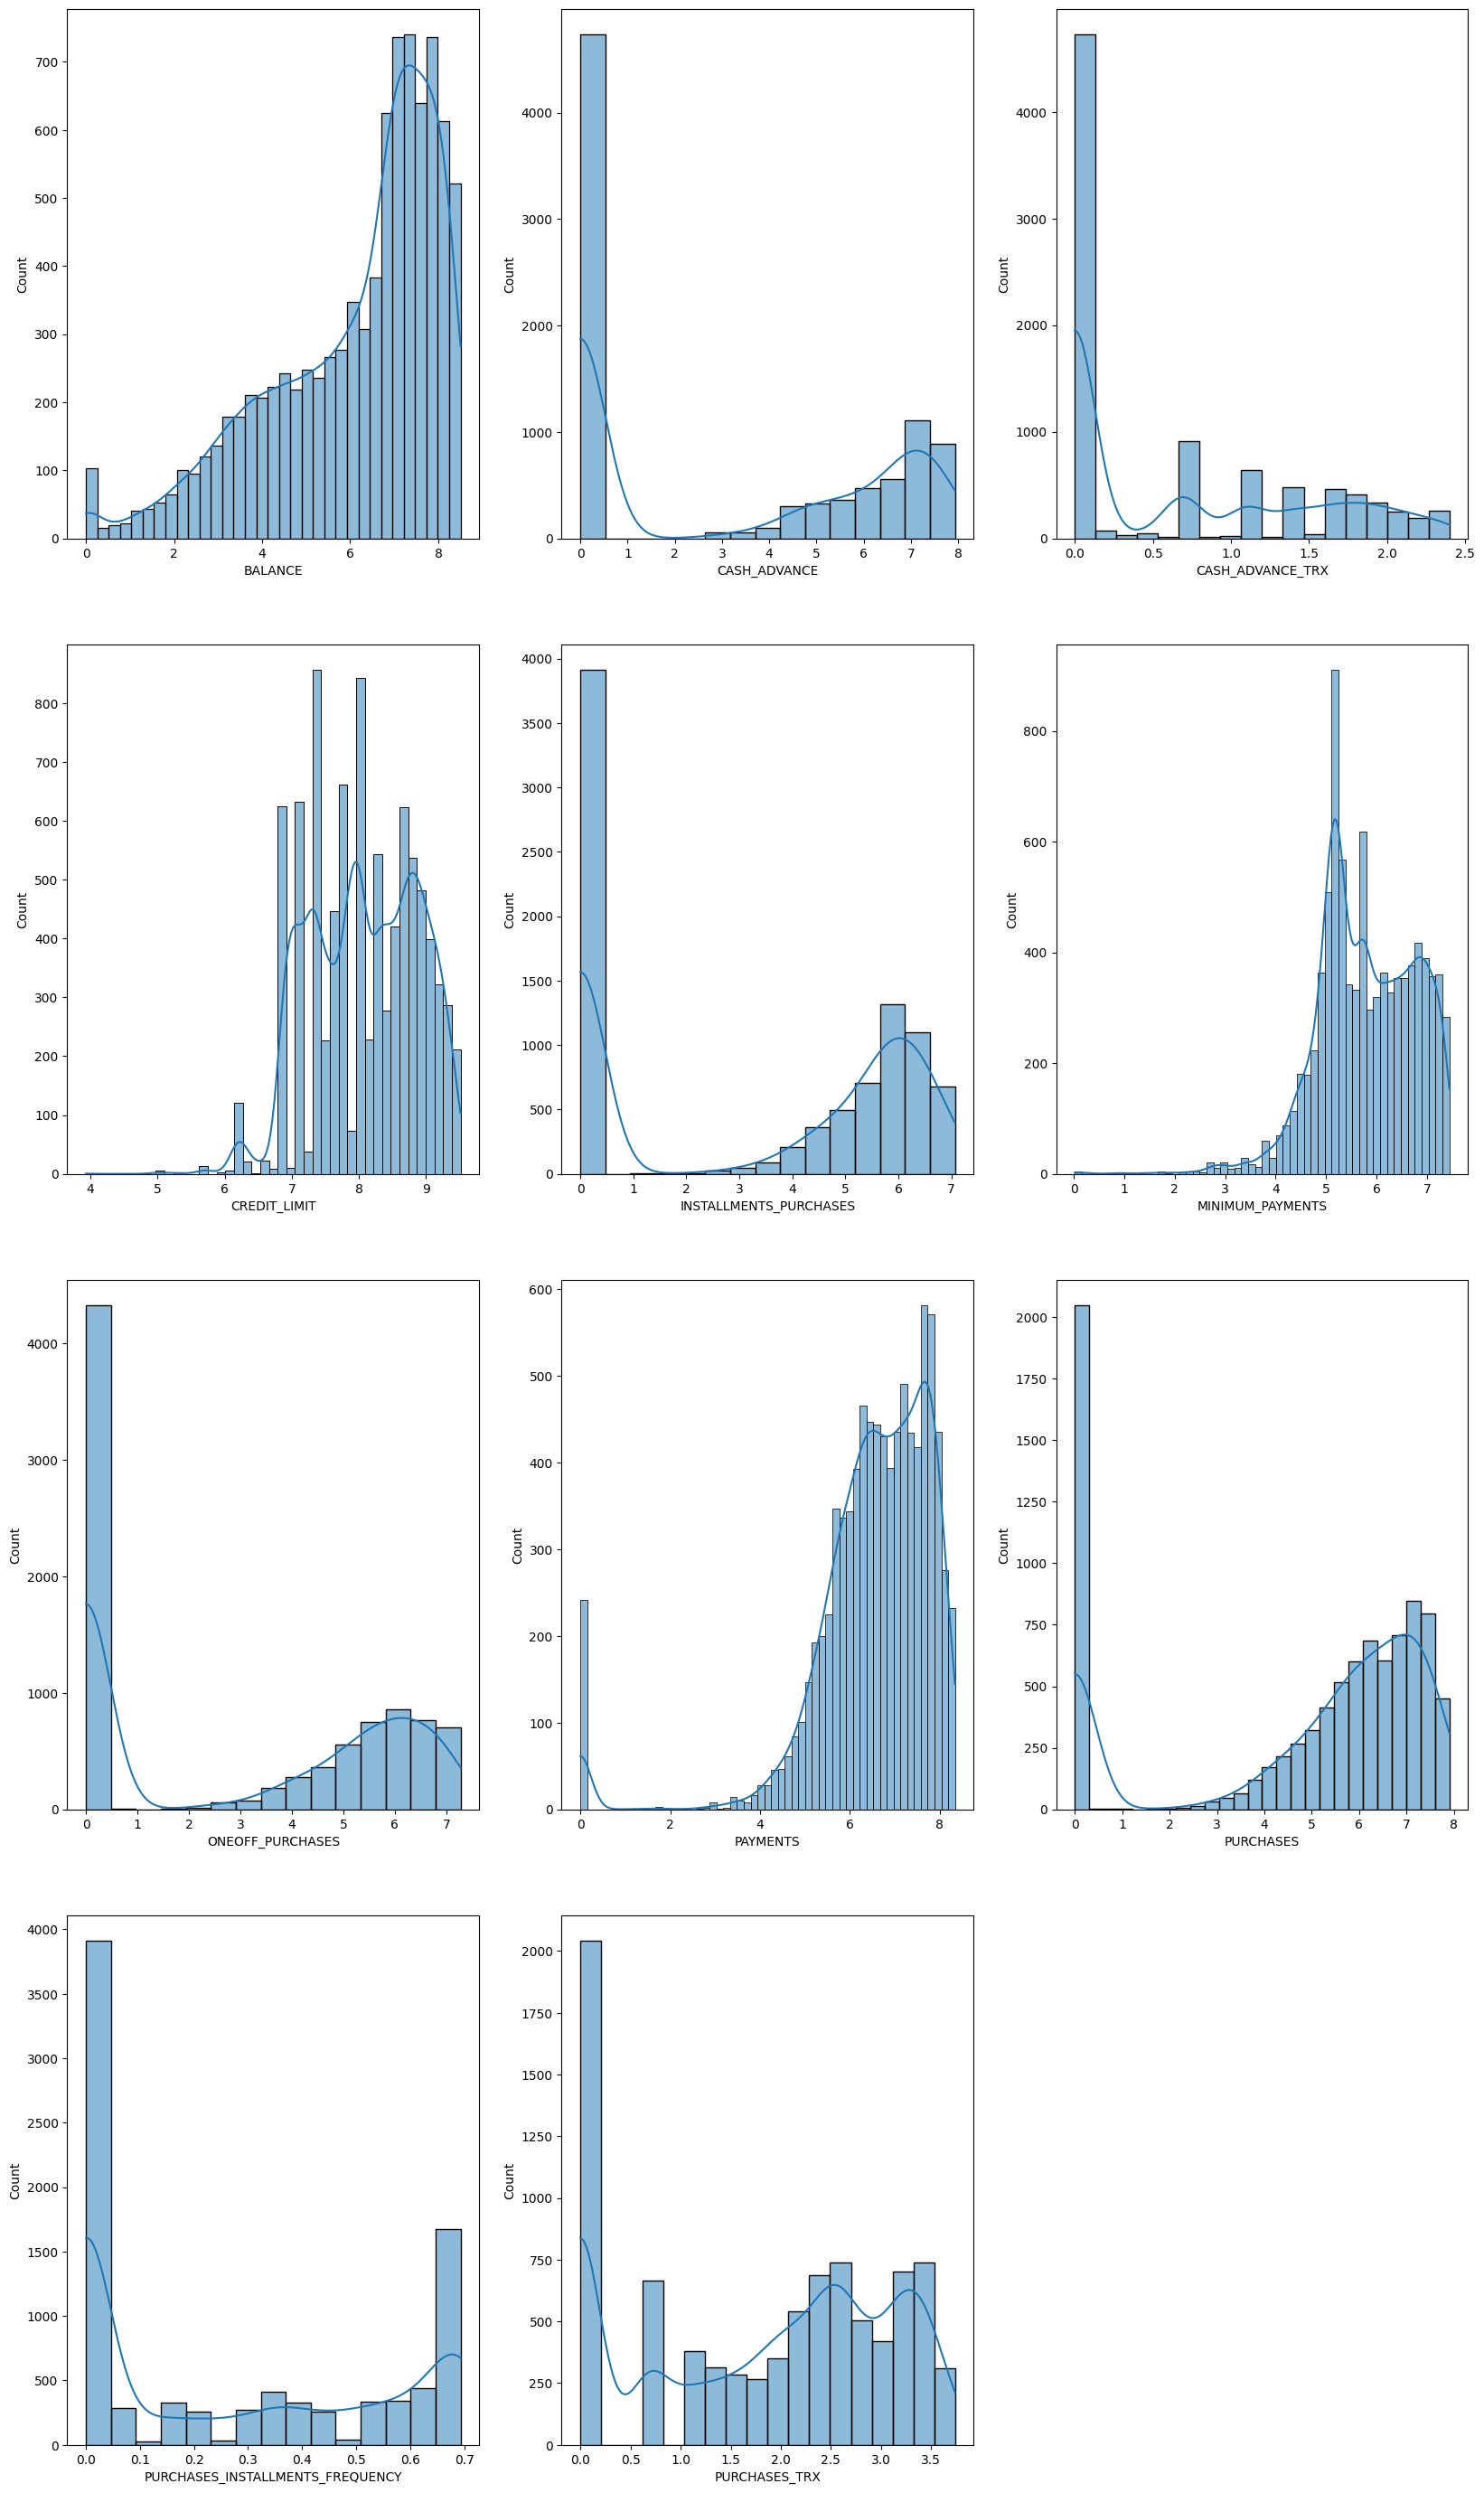

In [79]:
# Plot the data skewed after log transform
plt.figure(figsize=(20,35))
for i, col in enumerate(trans_df[Skewed_Cols]):
        ax = plt.subplot(4, 3, i+1)
        sns.histplot(trans_df[col] , ax=ax , kde=True)
        plt.xlabel(col)   
plt.show()

The distribution of the data after the application of the log transformation is not completely symmetrical, but the results are better when compared to the original skewness before the transformation. Although the distribution may still show some degree of asymmetry, the log transformation has successfully reduced the imbalance and improved the symmetry of the distribution.

In [34]:
# check trans_df
trans_df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  3.735304           0.818182   4.568506          0.000000   
1  8.071989           0.909091   0.000000          0.000000   
2  7.822504           1.000000   6.651791          6.651791   
3  7.419183           0.981818   7.313220          5.739529   
4  6.707735           1.000000   2.833213          2.833213   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                4.568506      0.000000             0.166667   
1                0.000000      6.974598             0.000000   
2                0.000000      0.000000             1.000000   
3                0.000000      5.331694             0.083333   
4                0.000000      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.080042   
1                    0.000000                          0.000000   
2                    0.650000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000          0.000000       1.098612      6.908755   
1                0.250000          1.609438       0.000000      8.853808   
2                0.000000          0.000000       2.564949      8.922792   
3                0.083333          0.693147       0.693147      8.922792   
4                0.000000          0.000000       0.693147      7.090910   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0  5.312231          4.945277          0.000000    12.0  
1  8.319725          6.978531          0.222222    12.0  
2  6.434654          6.442994          0.000000    12.0  
3  0.000000          5.747647          0.000000    12.0  
4  6.521114          5.504483          0.000000    12.0

In [81]:
# View the information of new dataframe
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8949 entries, 0 to 8948
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8949 non-null   float64
 1   BALANCE_FREQUENCY                 8949 non-null   float64
 2   PURCHASES                         8949 non-null   float64
 3   ONEOFF_PURCHASES                  8949 non-null   float64
 4   INSTALLMENTS_PURCHASES            8949 non-null   float64
 5   CASH_ADVANCE                      8949 non-null   float64
 6   PURCHASES_FREQUENCY               8949 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 10  CASH_ADVANCE_TRX                  8949 non-null   float64
 11  PURCHASES_TRX                     8949 non-null   float64
 12  CREDIT

#### 6.2. Feature Scaling

In [35]:
# summary of descriptive statistics (before scaling)
df.describe()

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count  8949.000000        8949.000000  8949.000000       8949.000000   
mean   1233.932883           0.977869   613.994769        230.821309   
std    1270.655593           0.060316   673.686479        345.216962   
min       0.000000           0.727273     0.000000          0.000000   
25%     128.365782           1.000000    39.580000          0.000000   
50%     868.331112           1.000000   360.000000         26.800000   
75%    1948.434315           1.000000  1027.410000        357.342000   
max    4940.113918           1.000000  2711.900000       1443.330000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8949.000000   8949.000000          8949.000000   
mean               224.655985    453.943700             0.490405   
std                285.286111    700.541047             0.401360   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                376.000000    830.921998             0.916667   
max               1170.490000   2784.294727             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8949.000000                       8949.000000   
mean                     0.169231                          0.364478   
std                      0.227225                          0.397451   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.272727                          0.750000   
max                      0.750000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8949.000000       8949.000000    8949.000000   8949.000000   
mean                 0.105060          1.762789      10.405900   4282.795634   
std                  0.140759          2.587516      10.757735   3102.903071   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.166667          3.000000      17.000000   6250.000000   
max                  0.545455         10.000000      41.000000  13600.000000   

          PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
count  8949.000000       8949.000000       8949.000000  8949.0  
mean   1189.910443        488.004281          0.031496    12.0  
std     996.381861        420.569641          0.070105     0.0  
min       0.000000          0.019163          0.000000    12.0  
25%     383.282850        170.851668          0.000000    12.0  
50%     856.196277        312.452292          0.000000    12.0  
75%    1875.180759        732.747143          0.016667    12.0  
max    4177.324826       1712.713459          0.333333    12.0

In the summary statistics above, it can be seen that there is a lot of variation in the magnitude of the data. There are some features that have low magnitude while some have high magnitude.

Since K-Means is a distance-based algorithm, this maginutde difference may cause problems. So it is necessary to standardize the data first. Standardizing with StandardScaler, Changes Values but keeps the same distribution.

In [108]:
# Initialize the StandardScaler object
Scaler = StandardScaler()
# Fit the scaler to the data and transform the data using the transform method
df_scaled = Scaler.fit_transform(trans_df)

In [84]:
# Convert the scaled data into a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    -1.218018          -2.647658  -0.075793         -0.996249   
1     1.025958          -1.140357  -1.713216         -0.996249   
2     0.896865           0.366944   0.670889          1.270704   
3     0.688170           0.065483   0.907955          0.959802   
4     0.320038           0.366944  -0.697748         -0.030681   
...        ...                ...        ...               ...   
8944 -1.399709           0.366944   0.321568         -0.996249   
8945 -1.595984           0.366944   0.332301         -0.996249   
8946 -1.497837          -2.396449   0.071510         -0.996249   
8947 -1.768619          -2.396449  -1.713216         -0.996249   
8948 -0.085770           0.366944   0.794913          1.388633   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   0.471989     -0.915486            -0.806649   
1                  -1.103750      1.202673            -1.221928   
2                  -1.103750     -0.915486             1.269742   
3                  -1.103750      0.703729            -1.014290   
4                  -1.103750     -0.915486            -1.014290   
...                      ...           ...                  ...   
8944                0.854380     -0.915486             1.269742   
8945                0.864709     -0.915486             1.269742   
8946                0.613742     -0.915486             0.854463   
8947               -1.103750      0.185688            -1.221928   
8948               -1.103750      0.558152             0.439186   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                      -0.744814                         -0.674357   
1                      -0.744814                         -0.958359   
2                       2.115946                         -0.958359   
3                      -0.378051                         -0.958359   
4                      -0.378051                         -0.958359   
...                          ...                               ...   
8944                   -0.744814                          1.192296   
8945                   -0.744814                          1.192296   
8946                   -0.744814                          0.854123   
8947                   -0.744814                         -0.958359   
8948                    2.189301                         -0.958359   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                  -0.746426         -0.822942      -0.572416     -1.475368   
1                   1.029758          1.185864      -1.451115      0.980622   
2                  -0.746426         -0.822942       0.600400      1.067726   
3                  -0.154367          0.042204      -0.896717      1.067726   
4                  -0.746426         -0.822942      -0.896717     -1.245363   
...                      ...               ...            ...           ...   
8944               -0.746426         -0.822942       0.105276     -1.475368   
8945               -0.746426         -0.822942       0.105276     -1.475368   
8946               -0.746426         -0.822942      -0.018018     -1.475368   
8947                0.437699          0.548281      -1.451115     -2.349333   
8948                1.621817          0.548281       1.090778     -1.245363   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0    -0.825133         -0.877630         -0.449298     0.0  
1     1.222655          1.229647          2.720734     0.0  
2    -0.060880          0.674613         -0.449298     0.0  
3    -4.442203         -0.046048         -0.449298     0.0  
4    -0.002010         -0.298066         -0.449298     0.0  
...        ...               ...               ...     ...  
8944 -0.500694         -1.950859         -0.211547     0.0  
8945 -0.613179         -0.046048         -0.449298     0.0  
8946 -1.439446         -1.418021          3.116992     0.0  
8947 -1.7

In [85]:
# summary of descriptive statistics (after scaling)
df_scaled.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count  8.949000e+03       8.949000e+03  8.949000e+03      8.949000e+03   
mean  -3.175965e-17       9.813731e-16 -2.350214e-16      1.715021e-16   
std    1.000056e+00       1.000056e+00  1.000056e+00      1.000056e+00   
min   -3.150815e+00      -4.154958e+00 -1.713216e+00     -9.962491e-01   
25%   -6.346868e-01       3.669435e-01 -3.859048e-01     -9.962491e-01   
50%    3.510786e-01       3.669435e-01  3.974490e-01      1.369343e-01   
75%    7.689482e-01       3.669435e-01  7.726710e-01      1.008182e+00   
max    1.250194e+00       3.669435e-01  1.120335e+00      1.483232e+00   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count            8.949000e+03  8.949000e+03         8.949000e+03   
mean            -1.703111e-16 -7.939912e-19         7.701715e-17   
std              1.000056e+00  1.000056e+00         1.000056e+00   
min             -1.103750e+00 -9.154862e-01        -1.221928e+00   
25%             -1.103750e+00 -9.154862e-01        -1.014290e+00   
50%              4.482943e-01 -9.154862e-01         2.390672e-02   
75%              9.423606e-01  1.126488e+00         1.062103e+00   
max              1.333419e+00  1.493466e+00         1.269742e+00   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                8.949000e+03                       8949.000000   
mean                -6.351930e-17                          0.000000   
std                  1.000056e+00                          1.000056   
min                 -7.448135e-01                         -0.958359   
25%                 -7.448135e-01                         -0.958359   
50%                 -3.780509e-01                         -0.411410   
75%                  4.555042e-01                          1.027237   
max                  2.556063e+00                          1.501025   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count            8.949000e+03      8.949000e+03   8.949000e+03  8.949000e+03   
mean            -9.686693e-17      7.334494e-17   1.794420e-16 -5.081544e-16   
std              1.000056e+00      1.000056e+00   1.000056e+00  1.000056e+00   
min             -7.464261e-01     -8.229421e-01  -1.451115e+00 -5.234291e+00   
25%             -7.464261e-01     -8.229421e-01  -8.967175e-01 -8.823744e-01   
50%             -7.464261e-01     -8.229421e-01   2.120781e-01 -8.900788e-02   
75%              4.376991e-01      9.073494e-01   8.606819e-01  8.375450e-01   
max              3.128888e+00      2.169970e+00   1.538374e+00  1.819159e+00   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
count  8.949000e+03      8.949000e+03      8.949000e+03  8949.0  
mean   2.223175e-16     -1.994506e-15     -6.193131e-17     0.0  
std    1.000056e+00      1.000056e+00      1.000056e+00     0.0  
min   -4.442203e+00     -5.983272e+00     -4.492984e-01     0.0  
25%   -3.899397e-01     -6.689444e-01     -4.492984e-01     0.0  
50%    1.563341e-01     -4.604835e-02     -4.492984e-01     0.0  
75%    6.896971e-01      8.354330e-01     -2.115467e-01     0.0  
max    1.234871e+00      1.714568e+00      4.305751e+00     0.0

Distribution of feature values to have a mean of 0 and a standard deviation of 1. Although the values change, the distribution of the data remains the same, so the relative proportion between values in the dataset is maintained.

---

#### 6.3. Dimensionality Reduction with PCA
The use of PCA to reduce the dimensionality of all features in the dataset, and the transformation results are stored in the X_pca variable.

In [41]:
# Initialize the PCA object
pca = PCA()

# Save the fitting result in a new variable (X_pca)
X_pca = pca.fit_transform(df_scaled)

In [110]:
# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)
X_pca.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.069877  3.130694  0.006436  0.664033 -0.067090  2.462348  0.613679   
1  3.673044 -1.013967  0.494152  2.506643 -2.158652 -0.484805  0.574420   
2 -1.523253 -1.488691 -2.740745 -0.787036 -0.155714 -0.083913  0.047190   
3  1.377507  0.859013 -1.745671 -1.312011  1.696390  0.603002 -1.823329   
4  1.074821  1.564697 -1.307683 -0.927586 -0.375306 -0.111044  1.387930   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.140715 -0.188952  0.281047 -0.018854 -0.618257  0.614119 -0.021271   
1 -1.200346  0.254568  0.103914 -0.124290 -0.051617 -0.193597 -0.103844   
2 -0.590958  1.088944  0.304862 -0.013553  0.869628  0.153719 -0.091864   
3 -3.132356 -1.125811 -1.118716  0.548794  0.737982  0.497440  0.288189   
4  0.467369 -0.041084 -0.110976  0.472537  0.110921 -0.121275 -0.099068   

       PC15      PC16  PC17  
0  0.062948  0.121147   0.0  
1 -0.006589  0.022622  -0.0  
2  0.106132  0.578632   0.0  
3  0.661849 -0.137902  -0.0  
4 -0.048072 -0.056344   0.0

Notes:
- "PC" stands for Principal Component, which is the main component resulting from PCA.
- PC1 is the first principal component, PC2 is the second principal component, and so on.
- Each PC is a linear combination of the original features in the dataset.
- Each PC has a weight that indicates how much the original feature contributes to the component.
- Principal Components are used to represent variation in data with a lower number of dimensions after dimensionality reduction. PC1 has the highest variance among all PCs, followed by PC2, and so on. Therefore, PC1 often represents the direction with the highest variability in the data.

In [89]:
# Find the variance of the ratio
pca.explained_variance_ratio_

array([0.35734465, 0.19072355, 0.1016164 , 0.07789727, 0.06130893,
       0.05650573, 0.04644382, 0.03719769, 0.02038273, 0.01273628,
       0.01107991, 0.00945657, 0.00828421, 0.00445746, 0.00256007,
       0.00200474, 0.        ])

In [90]:
# Calculating the cumulative variance ratio
pca.explained_variance_ratio_.cumsum()

array([0.35734465, 0.54806819, 0.64968459, 0.72758186, 0.78889079,
       0.84539652, 0.89184034, 0.92903803, 0.94942077, 0.96215705,
       0.97323696, 0.98269353, 0.99097773, 0.99543519, 0.99799526,
       1.        , 1.        ])

array([<Axes: title={'center': '% Explained Variance'}, xlabel='Component'>,
       <Axes: title={'center': '% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

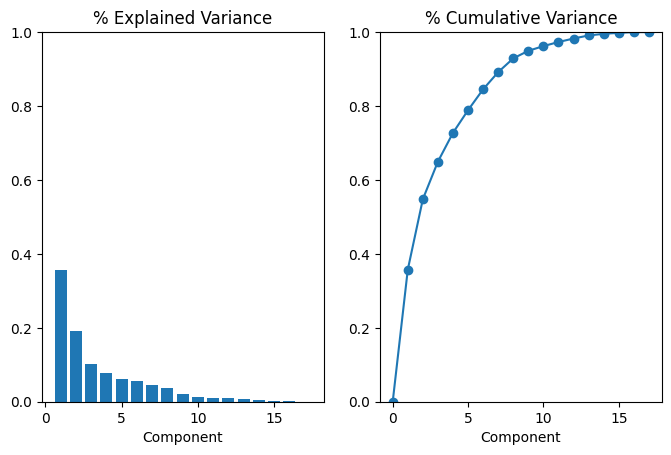

In [111]:
# Plot the Variance from PCA results
def plot_variance(pca, width=8, dpi=100):
  
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)

    # Evariance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )

    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )

    fig.set(figwidth=8, dpi=100)
    return axs

plot_variance(pca)

- The first bar graph shows the percentage of variance explained by each individual component.
- The second line graph shows the accumulated percentage of variance as the number of principal components increases. This graph illustrates the extent to which the principal components increase as subsequent components are added.

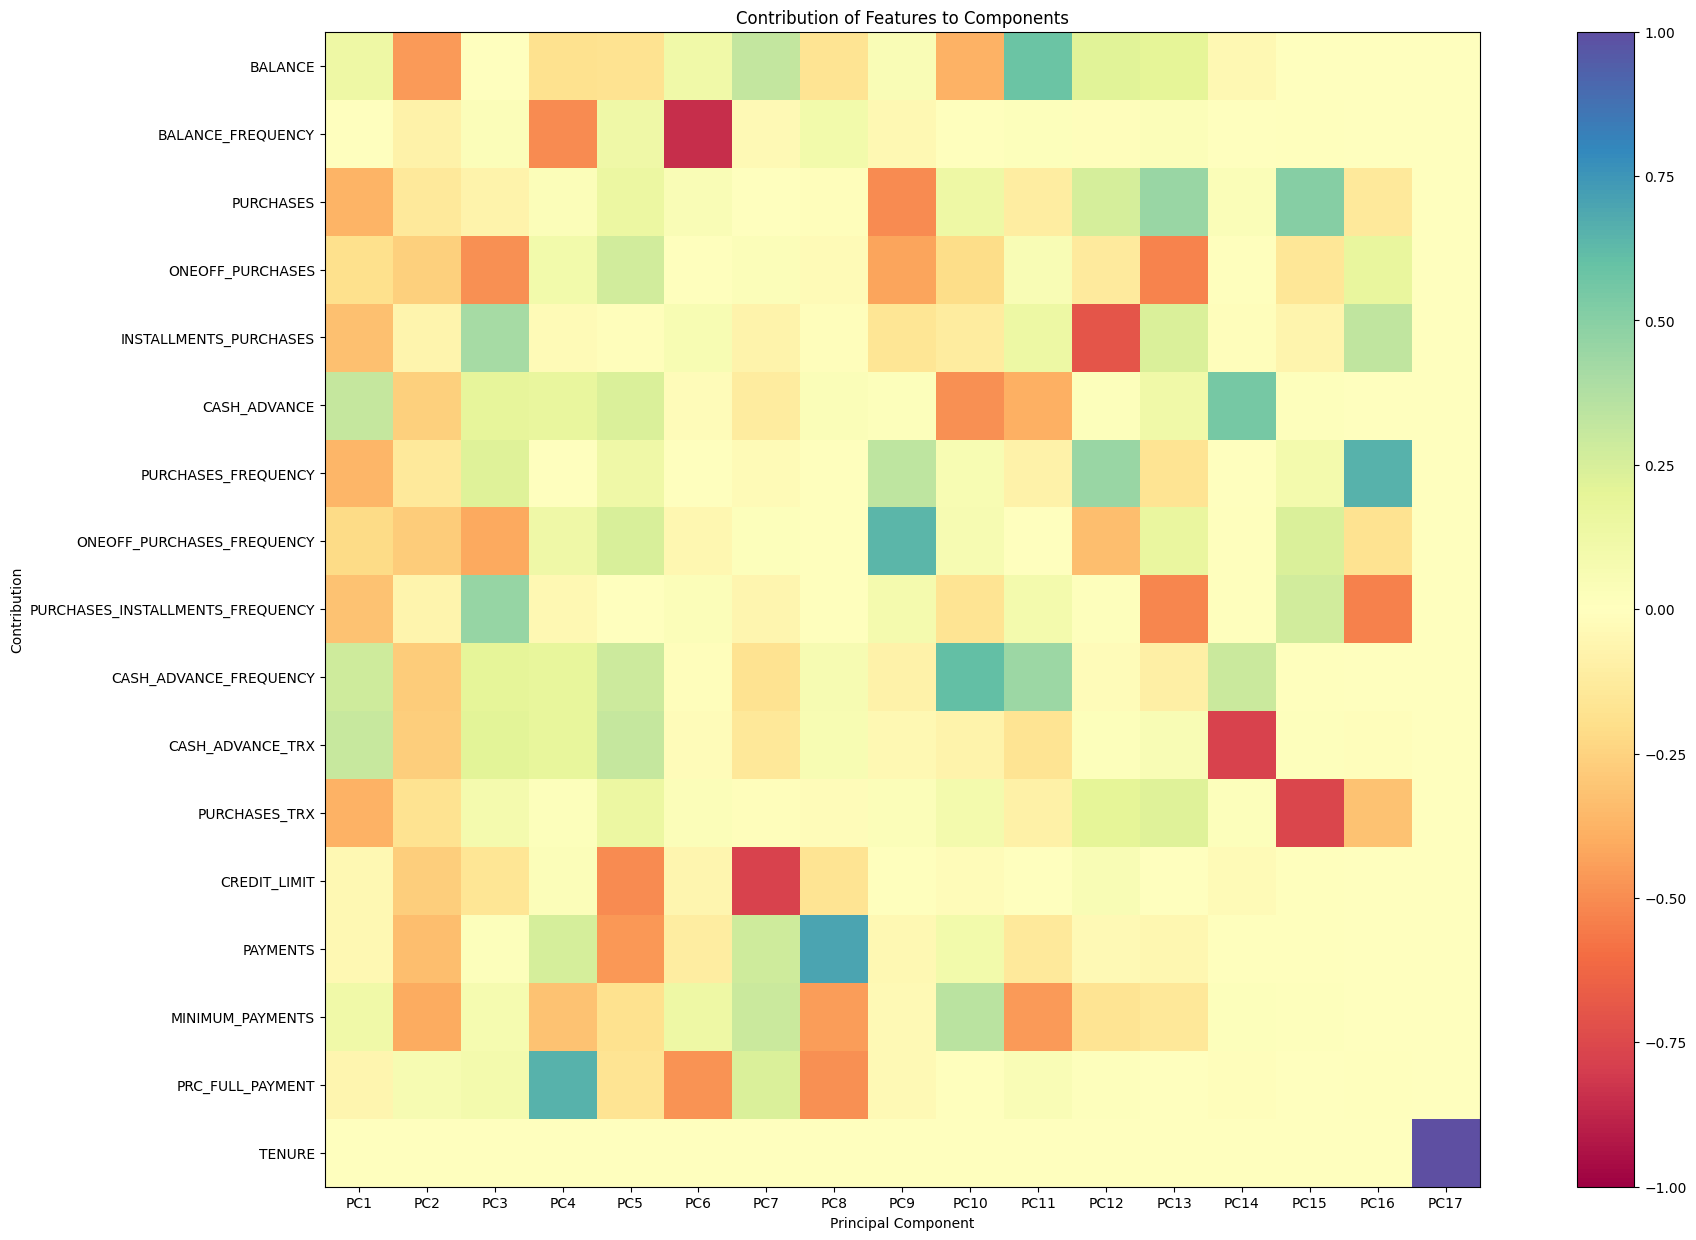

In [93]:
# PCA calculation result plot
plt.figure(figsize=(25,15))

plt.imshow(pca.components_.T,
           cmap="Spectral",
           vmin=-1,
           vmax=1,
          )

plt.yticks(range(len(df_scaled.columns)), df_scaled.columns)
plt.xticks(range(len(X_pca.columns)), X_pca.columns)
plt.xlabel("Principal Component")
plt.ylabel("Contribution")
plt.title("Contribution of Features to Components")
plt.colorbar()

This is an interpretation of the visualization results. If the color is more dominant in a certain part of the matrix, it indicates that the features in that dataset have a greater contribution to the corresponding principal component.

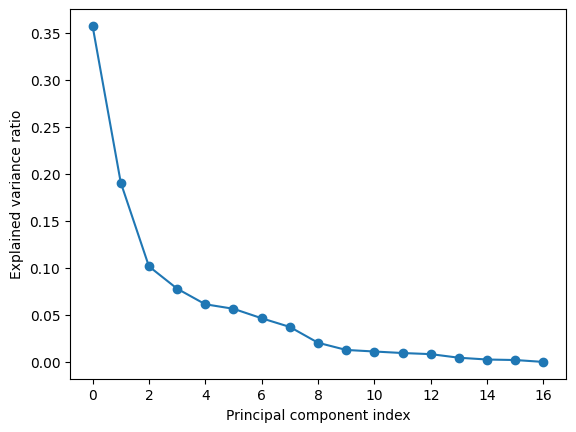

In [94]:
# Finding Optimum Number of Components
# Plot the explained variance ratio
plt.plot(pca.explained_variance_ratio_, '-o')

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

- The explained variance ratio plot is used to figure out how many principal components should be retained.
- This plot helps identify the point at which adding a principal component does not provide a significant increase in the explained variance ratio.
- A significant improvement is usually seen at the beginning, and then the curve tends to flatten out. That point can be considered the optimal number of principal components that should be retained to preserve most of the variance in the data.

In [95]:
# Select the 5 Components with the least number of dimensions
pca = PCA(n_components = 5 )
X_pca = pca.fit_transform(df_scaled)

In [96]:
# Convert PCA fitting result into dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)
X_pca.head()

PC1       PC2       PC3       PC4       PC5
0  0.069877  3.130694  0.006436  0.664033 -0.067089
1  3.673044 -1.013967  0.494152  2.506643 -2.158652
2 -1.523253 -1.488691 -2.740745 -0.787036 -0.155713
3  1.377507  0.859013 -1.745671 -1.312011  1.696391
4  1.074821  1.564697 -1.307683 -0.927586 -0.375306

In [97]:
# Find the variance of the ratio
pca.explained_variance_ratio_

array([0.35734465, 0.19072355, 0.1016164 , 0.07789727, 0.06130893])

In [98]:
# Calculating the cumulative variance ratio
pca.explained_variance_ratio_.cumsum()

array([0.35734465, 0.54806819, 0.64968459, 0.72758186, 0.78889079])

array([<Axes: title={'center': '% Explained Variance'}, xlabel='Component'>,
       <Axes: title={'center': '% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

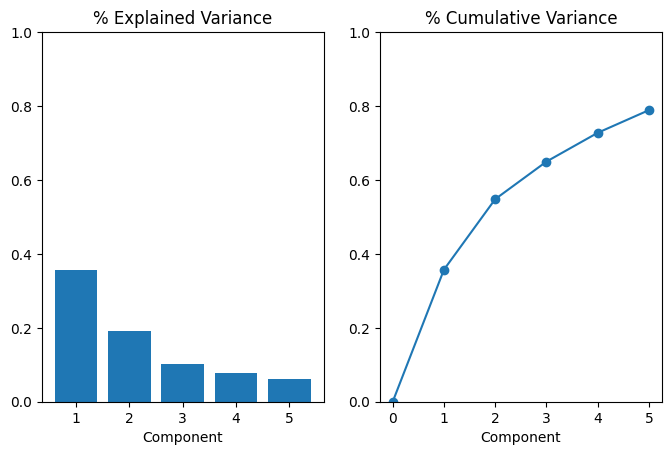

In [99]:
# Plot again the Variance after select the 5 components
plot_variance(pca)

The graph explains how much variance can be explained by each principal component individually and cumulatively. The first component (PC1) accounts for 35% of the total variance, and the first three components (PC1, PC2, PC3) account for 65% of the total variance.

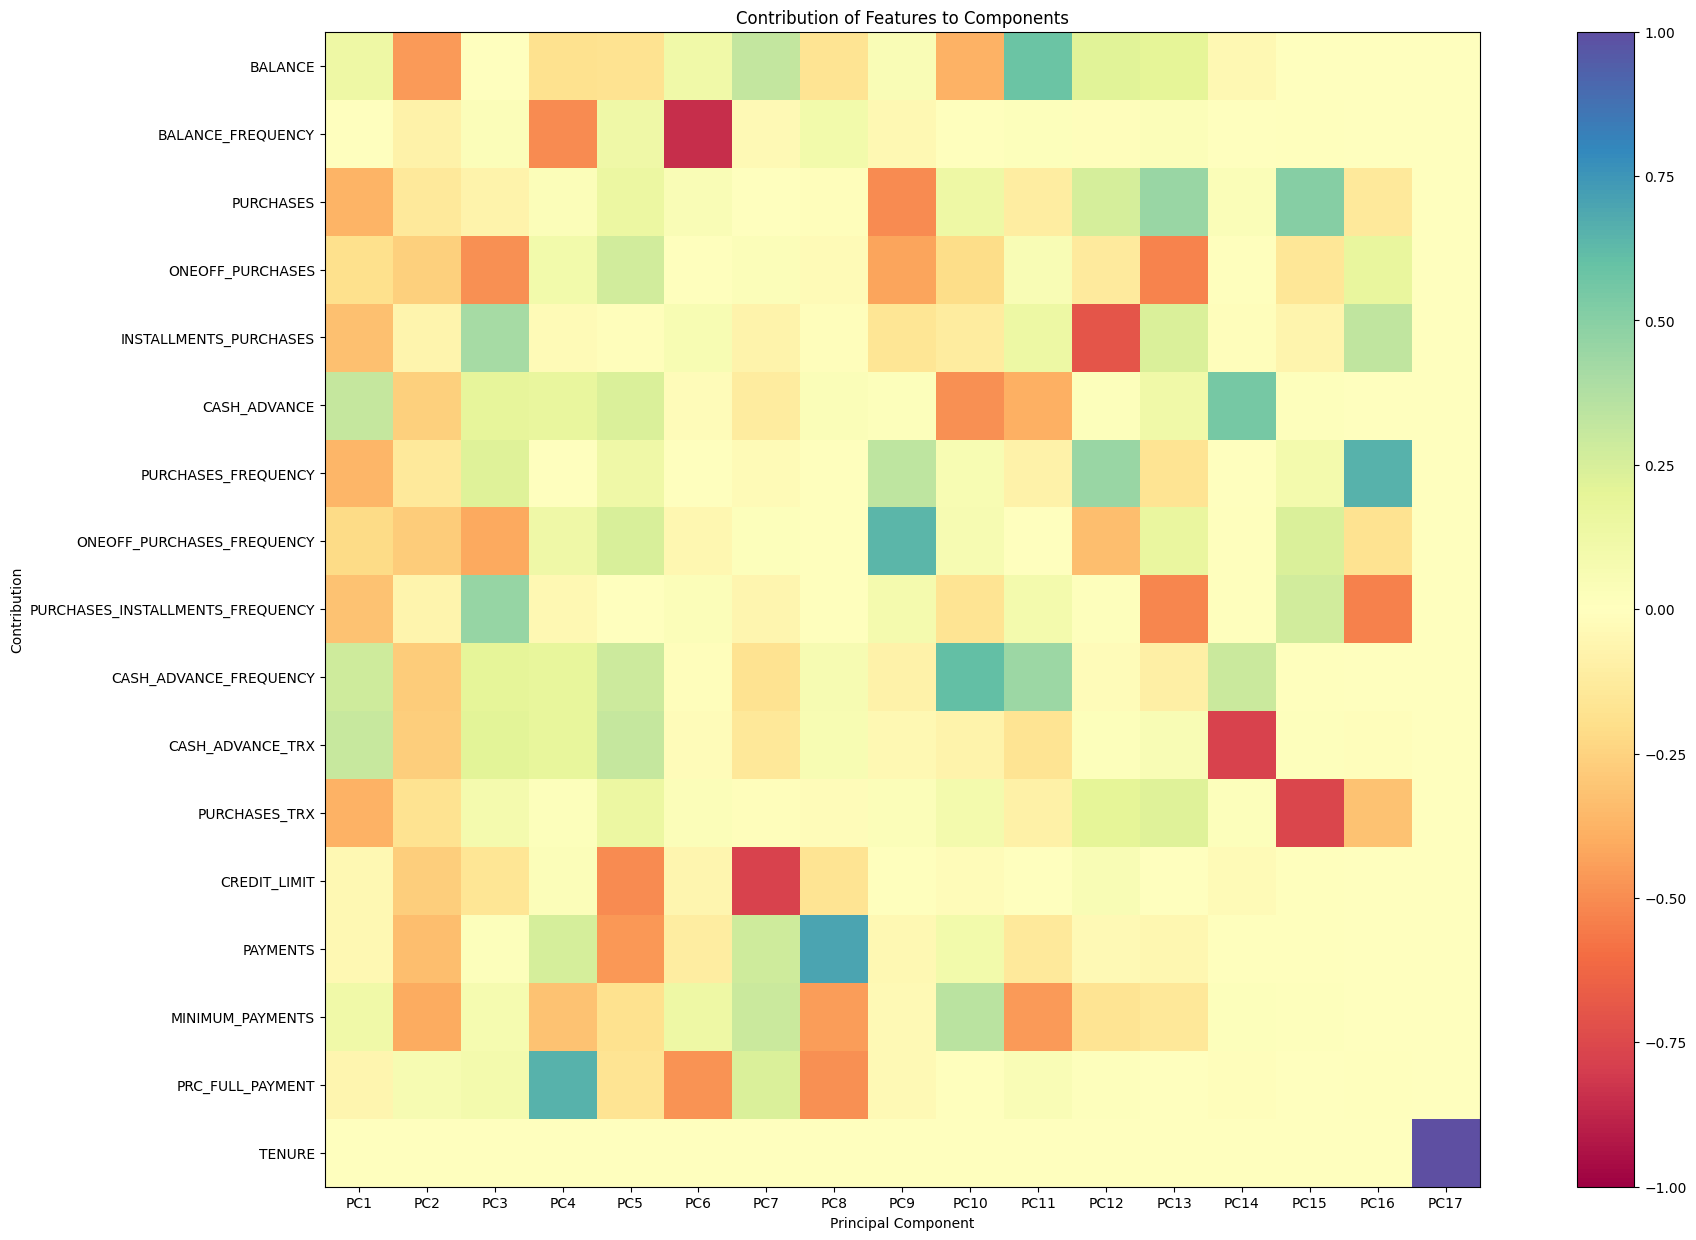

In [113]:
# Plot again the Contribution of Feature after select the 5 components
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

plt.figure(figsize=(25, 15))

plt.imshow(pca.components_.T,
           cmap="Spectral",
           vmin=-1,
           vmax=1,
          )

plt.yticks(range(len(df_scaled.columns)), df_scaled.columns)
plt.xticks(range(len(X_pca.columns)), X_pca.columns)
plt.xlabel("Principal Component")
plt.ylabel("Contribution")
plt.title("Contribution of Features to Components")
plt.colorbar()
plt.show()

Above is a color matrix that illustrates the contribution of each feature to each principal component. The colors in the matrix indicate the extent to which each feature contributes to each principal component.

### 7. Modelling
-----
At this stage, implementation or modeling with K-Means begins to be carried out on previously processed data (already scaled).

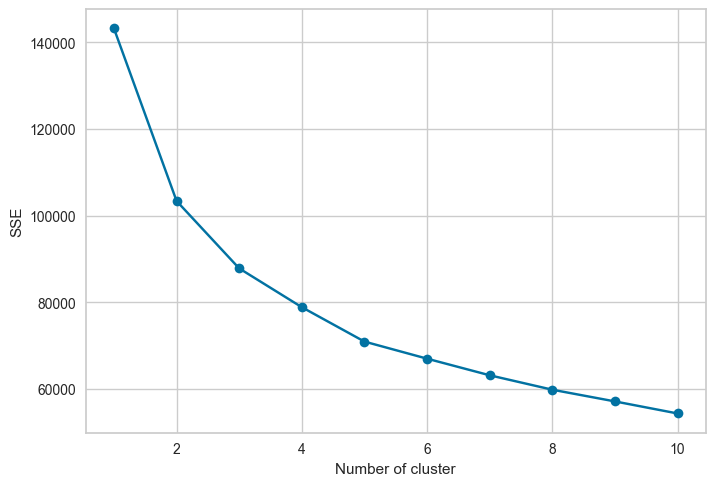

In [124]:
# determine the most optimal number of clusters using the inertia model
inertias = []

for n_cluster in range(1, 11):
    kmean= KMeans(n_cluster, random_state=0)
    kmean.fit(df_scaled)
    inertias.append(kmean.inertia_)

# Plot the result of inertias
plt.plot(range(1,11), inertias, '-o')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()    

The figure shows the optimal number of clusters in K-Means Clustering using the "Elbow Method". The plot shows the relationship between the number of clusters and the SSE value. so that it can determine the optimal cluster to be used. For the time being, the number of clusters was chosen to be equal to 4. 

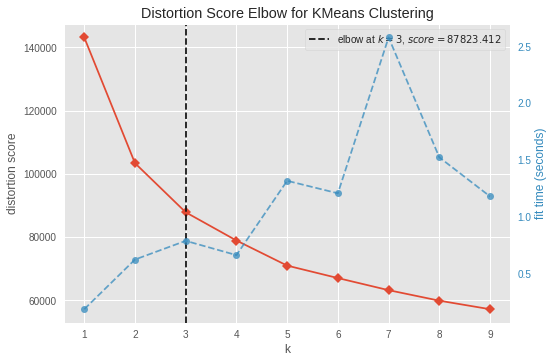

In [ ]:
# Visualize the K-Elbow
kmeans = KMeans(n_clusters=4, random_state=0)

vis_elbow = KElbowVisualizer(kmeans, k = (1,10))
vis_elbow.fit(df_scaled)
vis_elbow.poof()

The resulting graph will show the SSE values for various numbers of clusters, and the point where the decrease in SSE is no longer significant can be considered as the optimal number of clusters. Therefore, it can be considered to use 3 clusters in clustering customers for further analysis.

### 8. Training Model (Visualizing Clusters)
-----

In [43]:
# Initialize the KMeans object with the fix total cluster
kmeans = KMeans(n_clusters = 3, random_state=0)

# predict (X_pca) the result of clustering using kmeans
pca_labels = kmeans.fit_predict(X_pca)

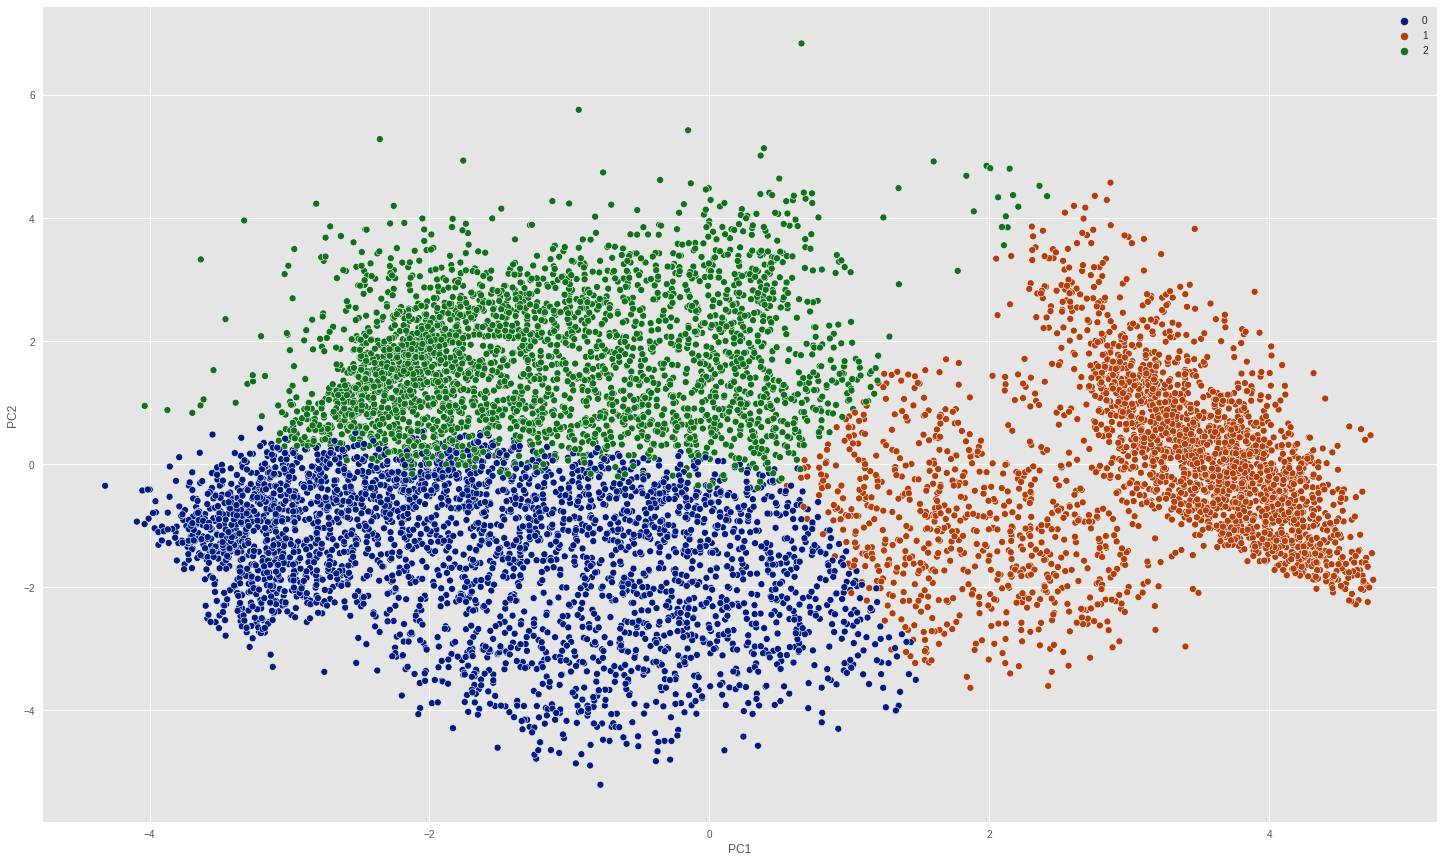

In [ ]:
# Plot the result of pca_labels
plt.figure(figsize=(25,15))
ax = sns.scatterplot(x= X_pca["PC1"], y= X_pca["PC2"], hue = pca_labels, data = X_pca, palette='dark')
plt.show()

- Each point on the scatter plot represents the data in two-dimensional form (PC1 and PC2) after the dimensionality reduction process with PCA.
- The color of each dot indicates membership into one of the three clusters generated by K-Means.

In [ ]:
# Visualization the clusters in 3D
fig = px.scatter_3d( X_pca, x= X_pca["PC1"], y= X_pca["PC2"], z = X_pca["PC3"] , color = pca_labels)
fig.show()

The visualization results show each data point in three-dimensional form based on the values of the three PCA principal components (PC1, PC2, and PC3). By using 3D representation, we can see the distribution and pattern of data that may not be visible in 2D visualization so that we can see overlapping if it occurs.

### 9. Model Evaluation (Cluster Analysis)
-----

In [47]:
# Initialize the KMeans object with the fix total cluster
kmeans = KMeans(n_clusters=3, random_state=0)

# predict (df_scaled) the result of clustering using kmeans
scaled_labels = kmeans.fit_predict(df_scaled)

In [48]:
# Insert the predicted result into the initial dataframe
df["Clusters"] = scaled_labels
df["Clusters"] = df["Clusters"].astype('category')
df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40             0.000   
1     3202.467416           0.909091       0.00             0.000   
2     2495.148862           1.000000     773.17           773.170   
3     1666.670542           0.981818    1499.00           309.918   
4      817.714335           1.000000      16.00            16.000   
...           ...                ...        ...               ...   
8944    28.493517           1.000000     291.12             0.000   
8945    19.183215           1.000000     300.00             0.000   
8946    23.398673           0.833333     144.40             0.000   
8947    13.457564           0.833333       0.00             0.000   
8948   372.708075           1.000000    1093.25          1093.250   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   1068.127248             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8944                  291.12      0.000000             1.000000   
8945                  300.00      0.000000             1.000000   
8946                  144.40      0.000000             0.833333   
8947                    0.00     36.558778             0.000000   
8948                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       0.650000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8944                    0.000000                          0.833333   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.666667   
8947                    0.000000                          0.000000   
8948                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000               0.0            2.0        1000.0   
1                   0.250000               4.0            0.0        7000.0   
2                   0.000000               0.0           12.0        7500.0   
3                   0.083333               1.0            1.0        7500.0   
4                   0.000000               0.0            1.0        1200.0   
...                      ...               ...            ...           ...   
8944                0.000000               0.0            6.0        1000.0   
8945                0.000000               0.0            6.0        1000.0   
8946                0.000000               0.0            5.0        1000.0   
8947                0.166667               2.0            0.0         500.0   
8948                0.333333               2.0           23.0        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE Clusters  
0      201.802084        139.509787          0.000000    12.0        2  
1     4103.032597       1072.340217          0.222222    12.0        0  
2      622.066742        627.284787          0.000000    12.0        1  
3        0.000000        312.452292          0.000000    12.0        0  
4      678.334763        244.791237          0.000000    12.0        2  
...           ...               ...               ...     ...      ...  
8944   325.594462         48.886365          0.016667    12.0        2  
89

<Figure size 2000x3500 with 0 Axes>

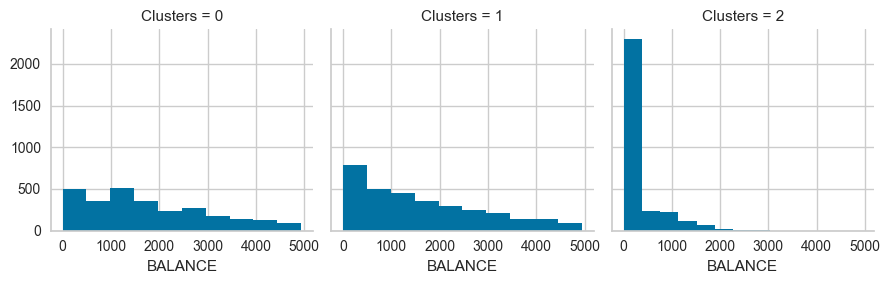

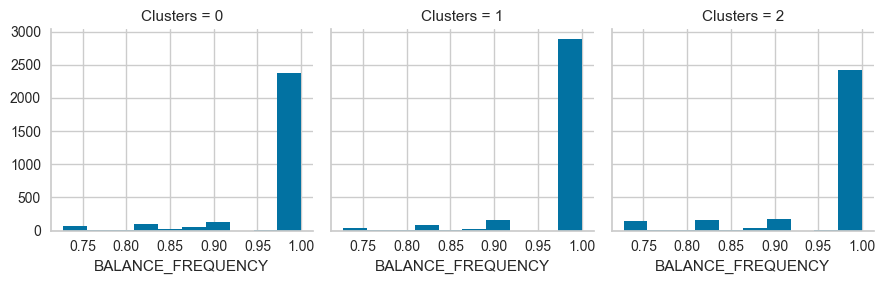

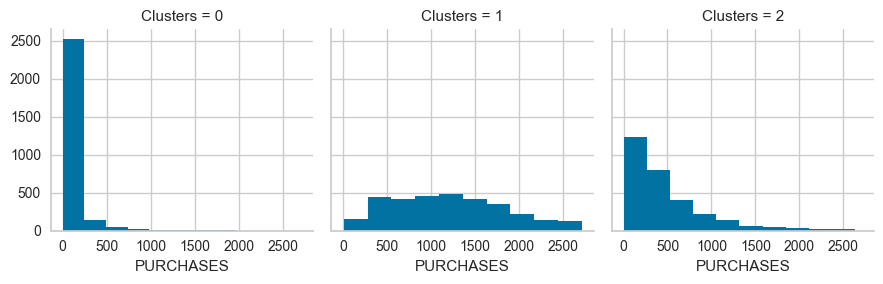

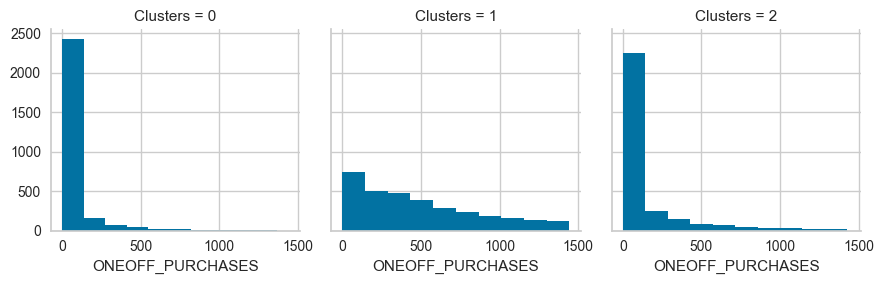

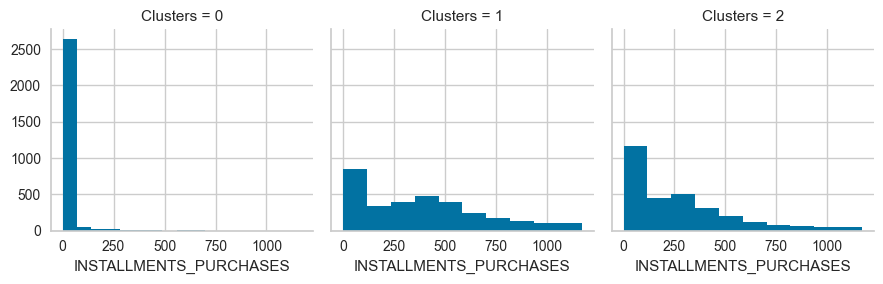

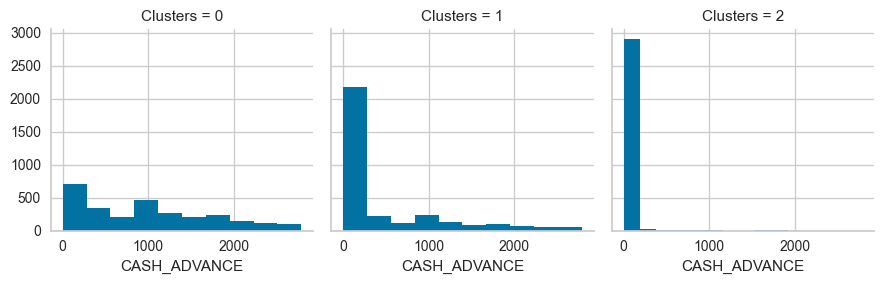

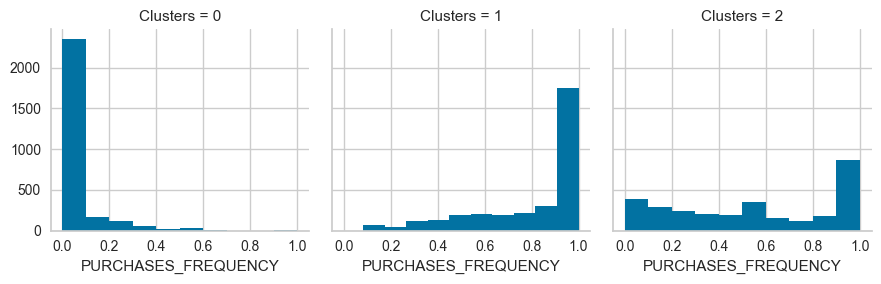

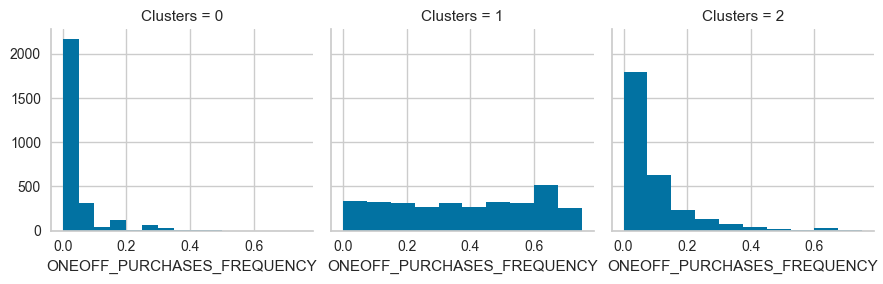

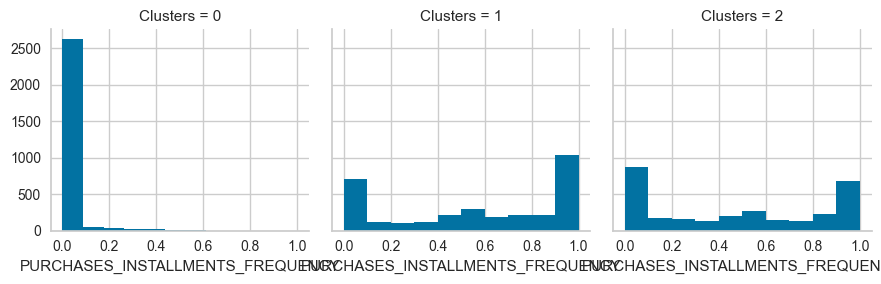

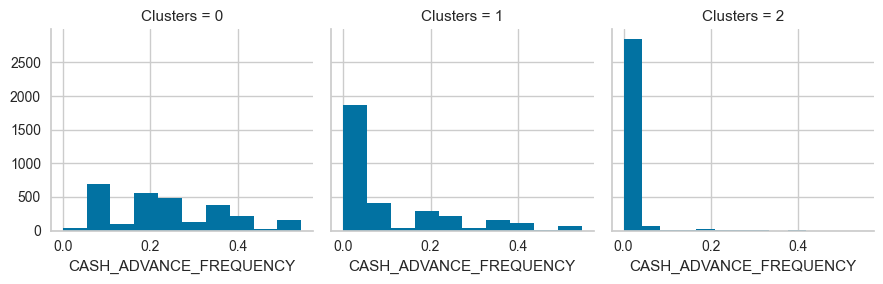

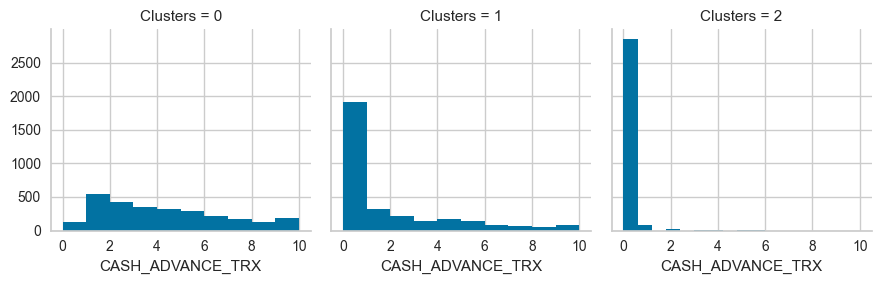

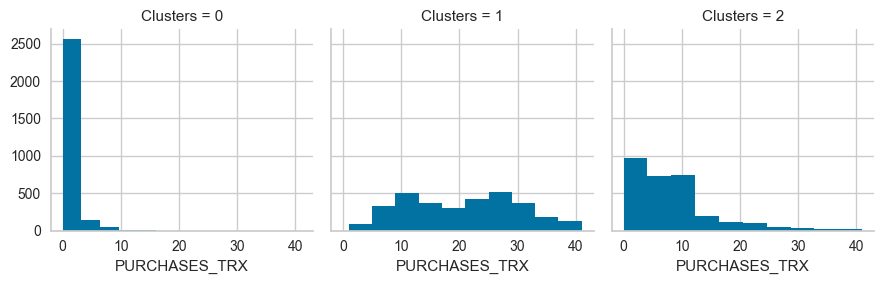

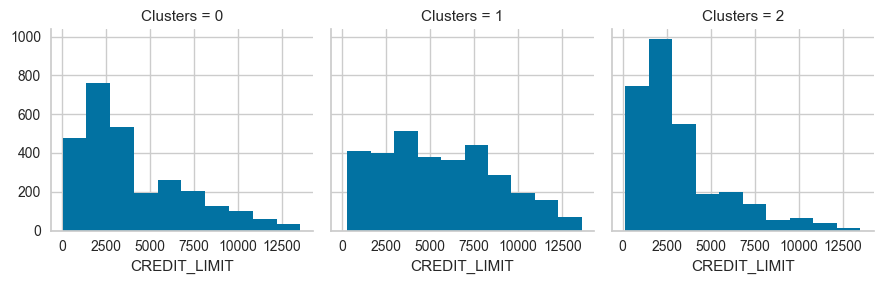

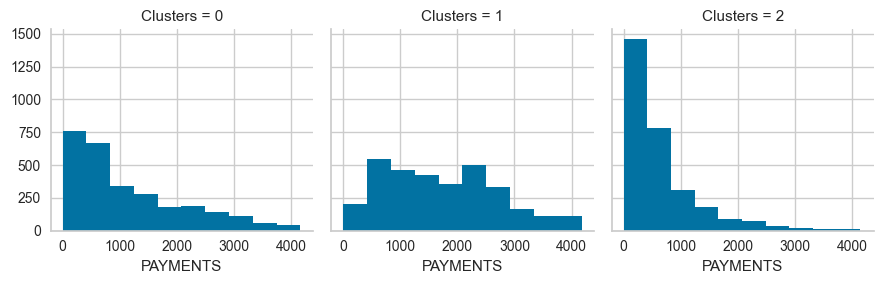

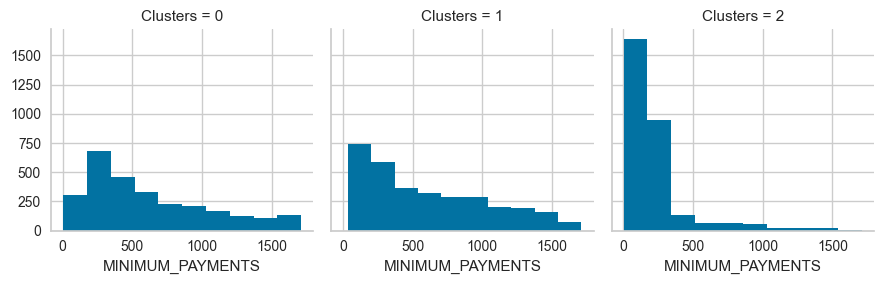

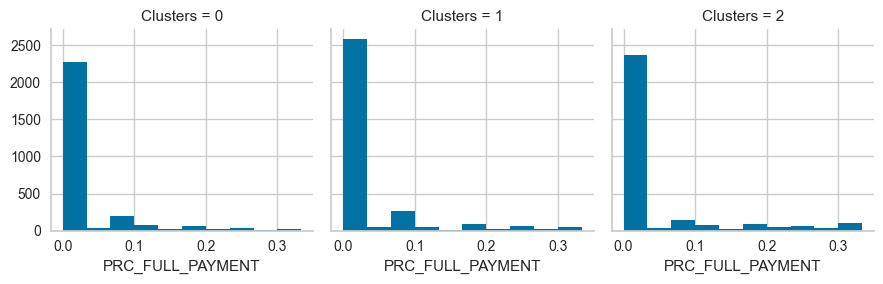

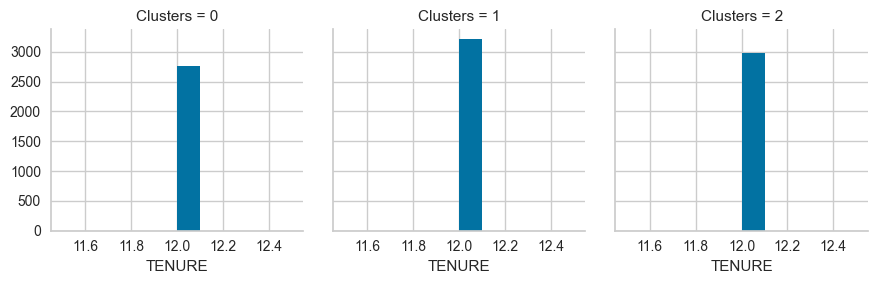

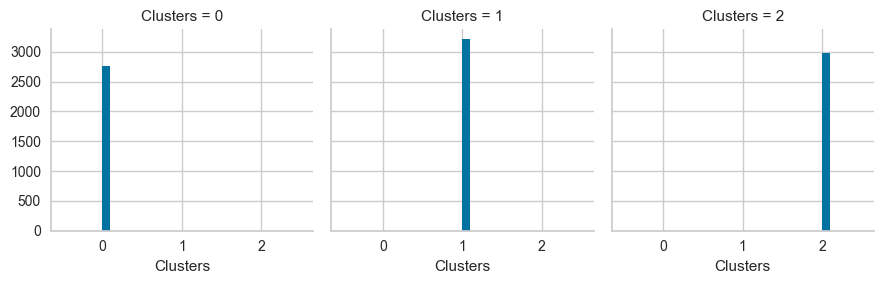

In [132]:
# Plotting to visually compare the distribution of each feature for each cluster
plt.figure(figsize=(20,35))

for col in df.columns:
    grid = sns.FacetGrid(df, col='Clusters')
    grid.map(plt.hist, col)
    plt.show()

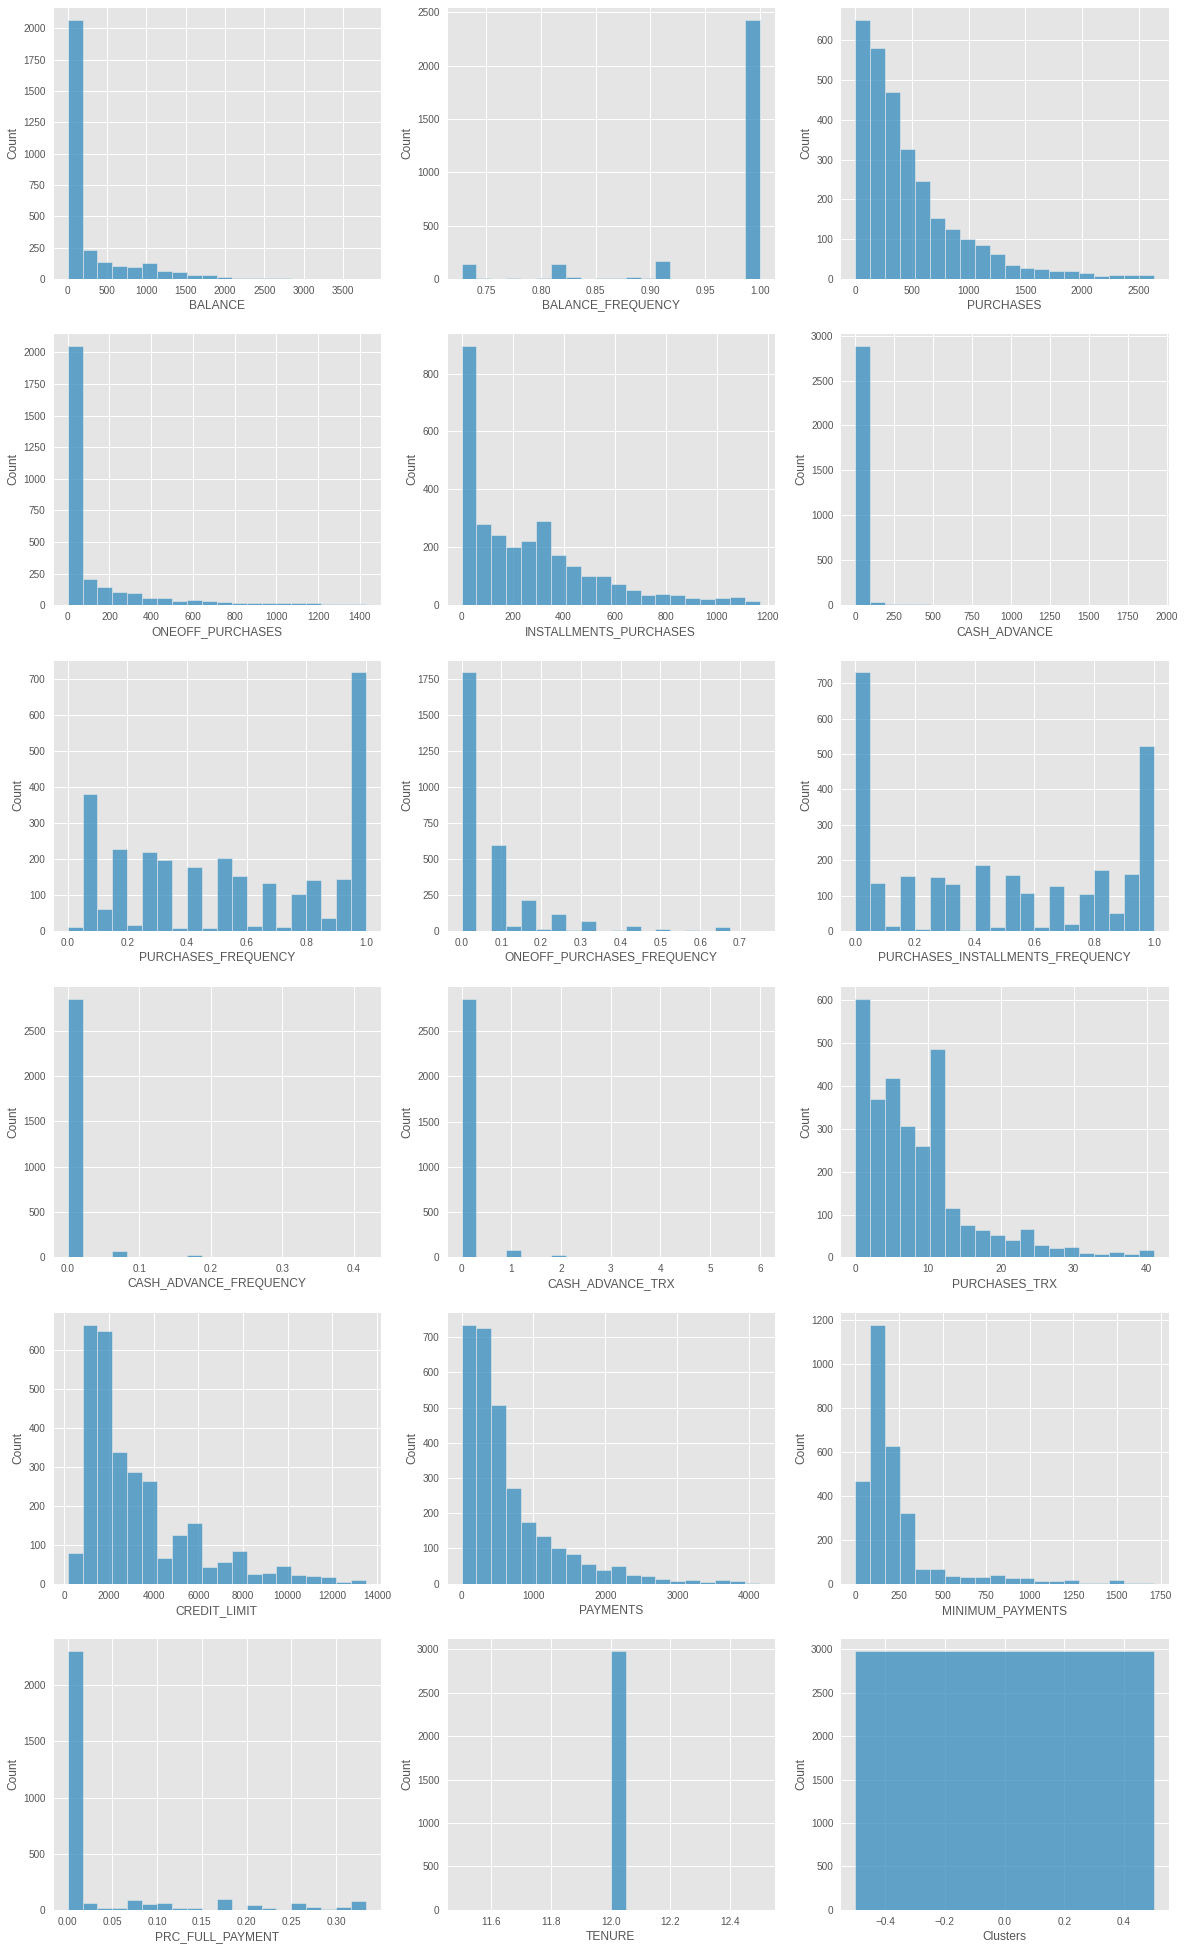

In [ ]:
# Plotting to visualize the distribution of each feature for data belonging to cluster 0.
plt.figure(figsize=(20,35))

for i, col in enumerate(df.columns):
        ax = plt.subplot(6, 3, i+1)
        sns.histplot( x = col , ax=ax , bins=20 , data = df[df['Clusters'] == 0])
        plt.xlabel(col)
        
plt.show()

- **Cluster 0 :**
 - **Customers with Lower balance But Update their Balance Frequently.**

 - **May Make Installment Purchases and doesn't Prefer Paying in Advance.**

 - **Purchase Frequently with Low Payments and they have a Low Credit Limit.**


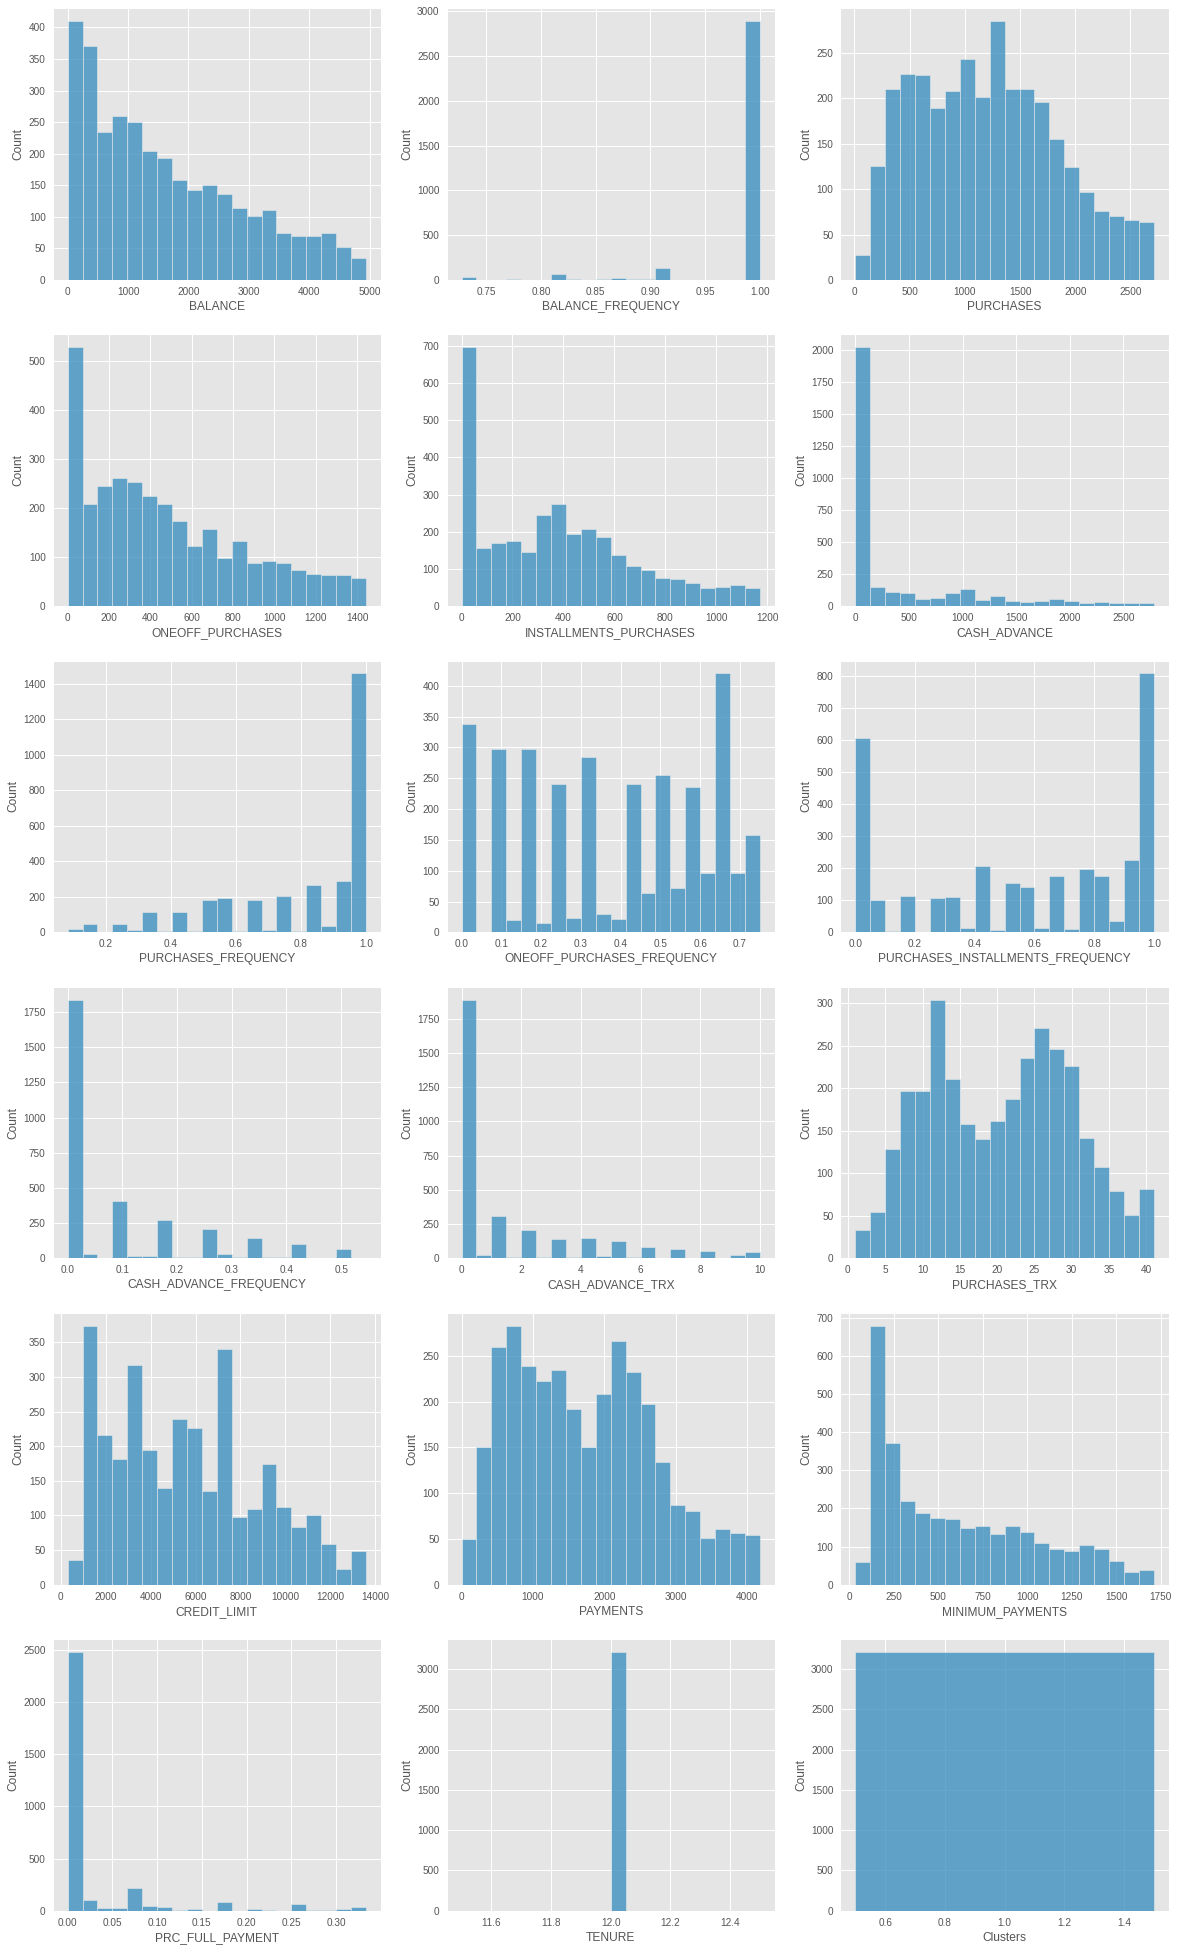

In [ ]:
# Plotting to visualize the distribution of each feature for data belonging to cluster 1.
plt.figure(figsize=(20,35))

for i, col in enumerate(df.columns):

        ax = plt.subplot(6, 3, i+1)

        sns.histplot( x = col , ax=ax , bins=20 , data = df[df['Clusters'] == 1])

        plt.xlabel(col)
        
plt.show()

- **Cluster 1 :**
 - **Customers with Medium Balance, Update their Balance More Frequently.** 

 - **With Medium Purchases Amount and pay more in Single Transaction, Prefer more Installment Purchases.**

 - **Purchase More Frequently with High Payments and they have a High Credit Limit.**

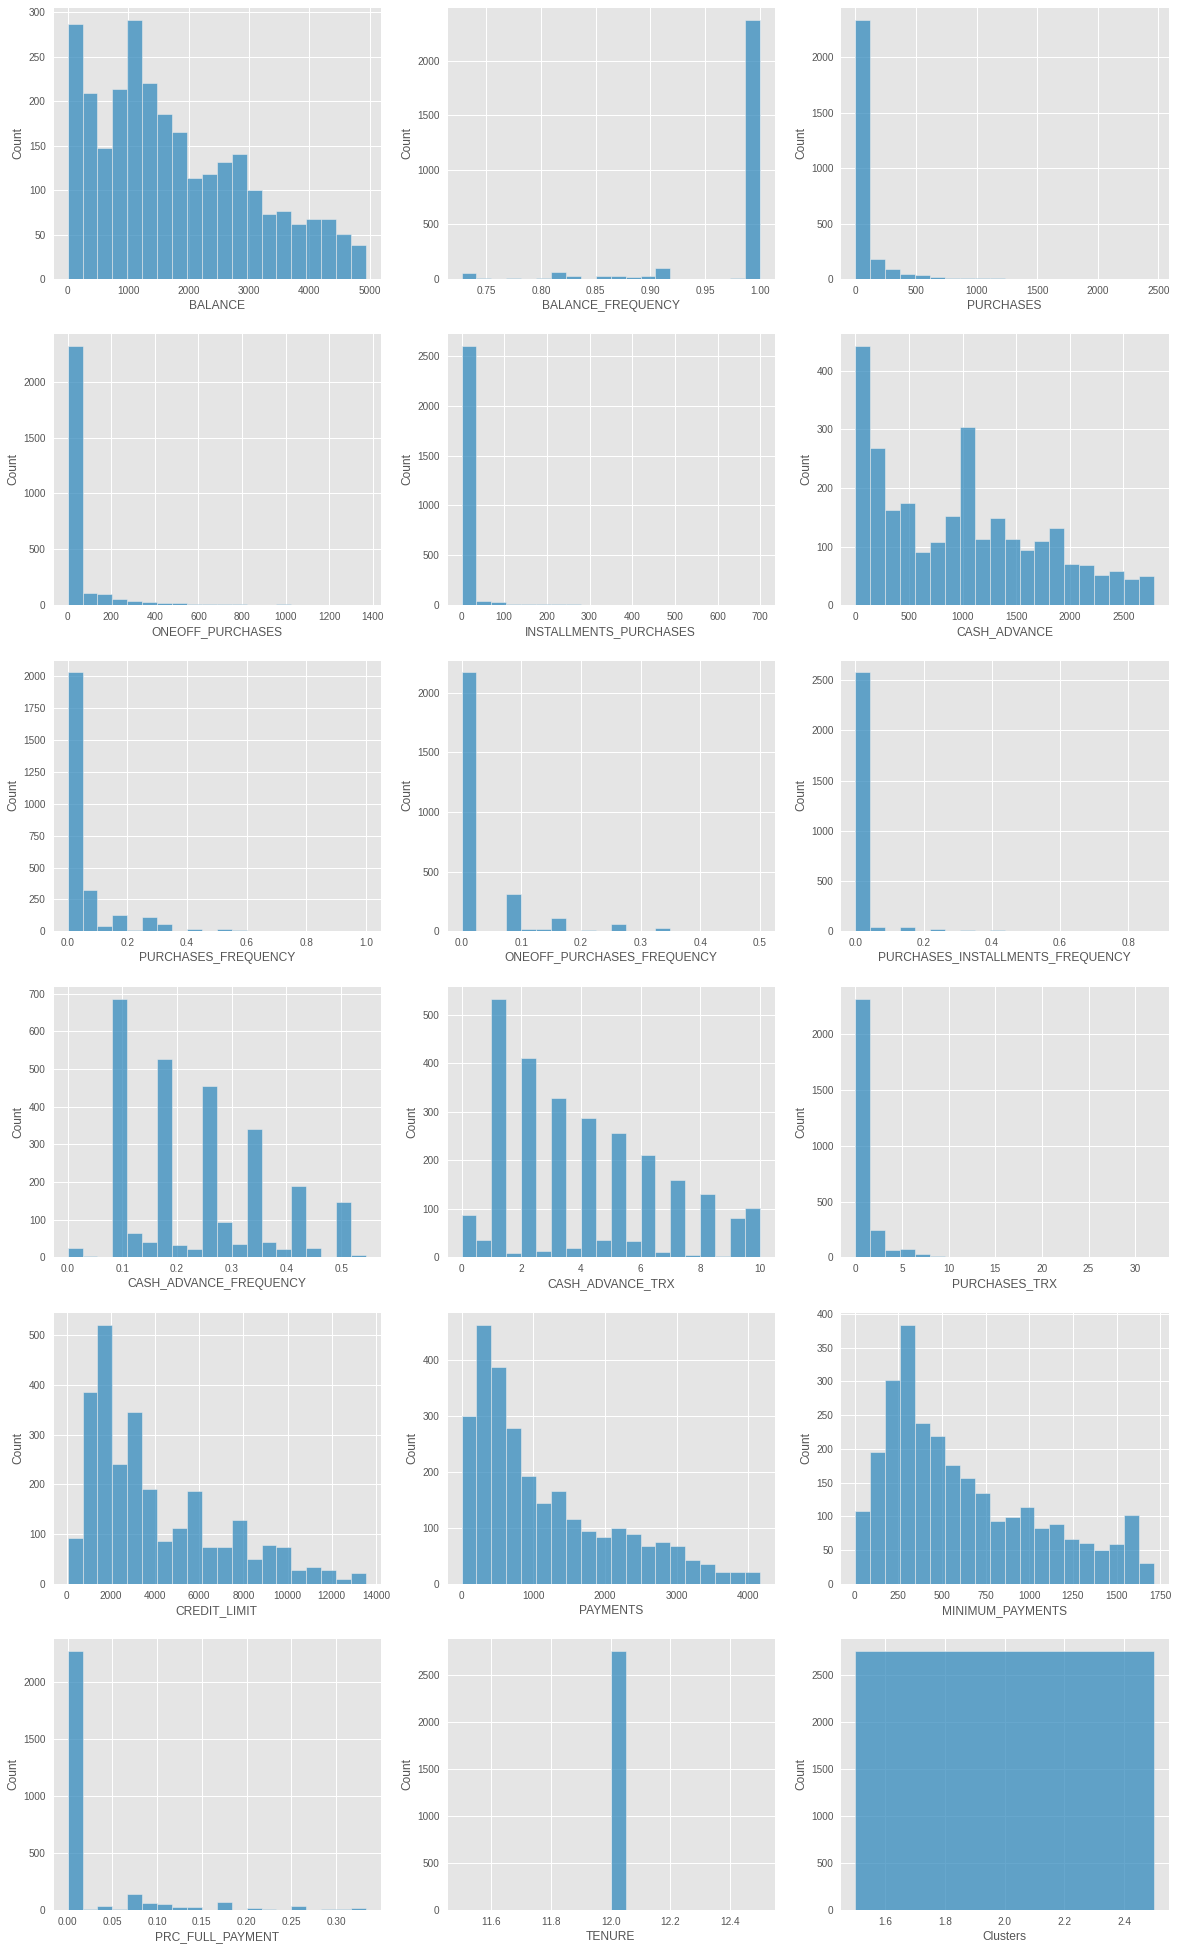

In [ ]:
# plotting to visualize the distribution of each feature for data belonging to cluster 2.
plt.figure(figsize=(20,35))

for i, col in enumerate(df.columns):
        ax = plt.subplot(6, 3, i+1)
        sns.histplot( x = col , ax=ax , bins=20 , data = df[df['Clusters'] == 2])
        plt.xlabel(col)
        
plt.show()

- **Cluster 2 :**
 - **Customers with Above Medium Balance.**

 - **Doesn't Prefer Installment Purchases , But Prefer to Pay in advance.**

 - **Doesn't Purchase Frequently but when they do it's with Medium Payments and they have a Medium Credit Limit.**

### 10 Model Inference
-----

In [25]:
inference = {'BALANCE':[21.399073, 712.723535, 100.903341],
             'BALANCE_FREQUENCY':[0.8, 0.933333, 0.542345],
             'PURCHASES':[95.4, 399.5, 122.0],
             'ONEOFF_PURCHASES ':[0., 823.7, 315.2],
             'INSTALLMENTS_PURCHASES':[79.91, 1123.65, 156.67],
             'CASH_ADVANCE':[90.510012, 10.214190, 36.709],
             'PURCHASES_FREQUENCY':[0.444444, 0.714286, 0.583333],
             'ONEOFF_PURCHASES_FREQUENCY':[0.8, 0.125, 0.878890],
             'PURCHASES_INSTALLMENTS_FREQUENCY':[0.625, 0.142857, 0.916667],
             'CASH_ADVANCE_FREQUENCY':[0.636364, 0.363636, 0.272727],
             'CASH_ADVANCE_TRX':[42, 69, 53],
             'PURCHASES_TRX':[36, 185, 99],
             'CREDIT_LIMIT':[3800, 2000, 900],
             'PAYMENTS':[81.270775, 4103.032597, 52.549959],
             'MINIMUM_PAYMENTS':[88.288956, 1072.340217, 627.284787],
             'PRC_FULL_PAYMENT':[0.571429, 0.909091, 0.833333],
             'TENURE':[9, 7, 11]
             }
inference = pd.DataFrame(inference)
inference

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES   \
0   21.399073           0.800000       95.4                0.0   
1  712.723535           0.933333      399.5              823.7   
2  100.903341           0.542345      122.0              315.2   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   79.91     90.510012             0.444444   
1                 1123.65     10.214190             0.714286   
2                  156.67     36.709000             0.583333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                     0.80000                          0.625000   
1                     0.12500                          0.142857   
2                     0.87889                          0.916667   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.636364                42             36          3800   
1                0.363636                69            185          2000   
2                0.272727                53             99           900   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0    81.270775         88.288956          0.571429       9  
1  4103.032597       1072.340217          0.909091       7  
2    52.549959        627.284787          0.833333      11

In [27]:
# Initialize the KMeans object with the fix total cluster
kmeans = KMeans(n_clusters = 3, random_state=0)

# predict (X_pca) the result of clustering using kmeans
inference_result = kmeans.fit_predict(inference)

In [28]:
# Insert the predicted result into the initial dataframe
inference["Clusters"] = inference_result
inference["Clusters"] = inference["Clusters"].astype('category')
inference

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES   \
0   21.399073           0.800000       95.4                0.0   
1  712.723535           0.933333      399.5              823.7   
2  100.903341           0.542345      122.0              315.2   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   79.91     90.510012             0.444444   
1                 1123.65     10.214190             0.714286   
2                  156.67     36.709000             0.583333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                     0.80000                          0.625000   
1                     0.12500                          0.142857   
2                     0.87889                          0.916667   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.636364                42             36          3800   
1                0.363636                69            185          2000   
2                0.272727                53             99           900   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE Clusters  
0    81.270775         88.288956          0.571429       9        2  
1  4103.032597       1072.340217          0.909091       7        0  
2    52.549959        627.284787          0.833333      11        1

### 11. Conclusion
-----

Berdasarkan hasil analisis keseluruhan yang telah dilakukan, dapat disimpulkan bahwa:
- Project ini membahas tentang pengimplementasian algoritma Unsupervised Learning. Metode yang digunakan untuk menyelesaikan permasalahannya adalah Principal Component Analysis (PCA) dan K-Means.
- Dalam mencari nilai optimal untuk menentukan jumlah clustering, digunakan teknik ELBOW METHOD.
- Diperoleh jumlah Cluster paling optimal, yaitu 5.
- Setelah melalui beberapa analisis dan teknik pemrosesan, data yang digunakan dapat dikelompokkan menjadi 3 clustering, dimana ketiga cluster tersebut memiliki kriteria yang berbeda, yaitu:
  1. Cluster 0: Tipe Pengguna yang Sering Melakukan Pembelian Kecil dan Mungkin Menggunakan Cicilan.
  2. Cluster 1: Tipe Pengguna yang Sering Melakukan Pembelian Sedang hingga Besar dan Lebih Memilih Pembayaran dengan Cicilan.  
  3. Cluster 2: Tipe Pengguna yang Kurang Aktif dalam Membeli, Tetapi Ketika Melakukan Pembelian, Lebih Memilih Pembayaran Penuh di Muka.